# Exploration of Dataset for Project 1

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%load_ext autoreload
%autoreload 2
from helpers import *
from implementations import *

In [2]:
# Load Data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_submission_df = pd.read_csv('data/sample-submission.csv')

In [3]:
# Some basic info about the datasets
train_df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id                           250000 non-null  int64  
 1   Prediction                   250000 non-null  object 
 2   DER_mass_MMC                 250000 non-null  float64
 3   DER_mass_transverse_met_lep  250000 non-null  float64
 4   DER_mass_vis                 250000 non-null  float64
 5   DER_pt_h                     250000 non-null  float64
 6   DER_deltaeta_jet_jet         250000 non-null  float64
 7   DER_mass_jet_jet             250000 non-null  float64
 8   DER_prodeta_jet_jet          250000 non-null  float64
 9   DER_deltar_tau_lep           250000 non-null  float64
 10  DER_pt_tot                   250000 non-null  float64
 11  DER_sum_pt                   250000 non-null  float64
 12  DER_pt_ratio_lep_tau         250000 non-null  float64
 13 

In [5]:
train_df.describe()

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [6]:
sample_submission_df.head()

,Id,Prediction
0,350000,-1
1,350001,-1
2,350002,-1
3,350003,-1
4,350004,-1


## More exploration - Visualizations

In [7]:
data = load_csv_data('data/train.csv')
data

(array([ 1., -1., -1., ...,  1., -1., -1.]),
 array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
        [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
        [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
        ...,
        [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
        [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
        [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]]),
 array([100000, 100001, 100002, ..., 349997, 349998, 349999]))

In [8]:
df = pd.DataFrame(data)
df = df.transpose()
df

,0,1,2
0,1.0,"[138.47, 51.655, 97.827, 27.98, 0.91, 124.711,...",100000
1,-1.0,"[160.937, 68.768, 103.235, 48.146, -999.0, -99...",100001
2,-1.0,"[-999.0, 162.172, 125.953, 35.635, -999.0, -99...",100002
3,-1.0,"[143.905, 81.417, 80.943, 0.414, -999.0, -999....",100003
4,-1.0,"[175.864, 16.915, 134.805, 16.405, -999.0, -99...",100004
...,...,...,...
249995,-1.0,"[-999.0, 71.989, 36.548, 5.042, -999.0, -999.0...",349995
249996,-1.0,"[-999.0, 58.179, 68.083, 22.439, -999.0, -999....",349996
249997,1.0,"[105.457, 60.526, 75.839, 39.757, -999.0, -999...",349997
249998,-1.0,"[94.951, 19.362, 68.812, 13.504, -999.0, -999....",349998


In [9]:
# -999 values as NaN
train_df = train_df.replace(-999, np.nan)
train_df = train_df.replace('b', '-1')
train_df = train_df.replace('s', '1')
train_df['Prediction'] = train_df['Prediction'].astype('int64')
#sns.regplot(x='DER_mass_MMC', y='Prediction', data=train_df)

In [10]:
#sns.regplot(x='DER_mass_transverse_met_lep', y='Prediction', data=train_df, y_jitter=0.3)

## Setup and Classification

In [11]:
# Load Data Properly
yb, input_data, ids = load_csv_data('data/train.csv')

In [12]:
yb.shape , input_data.shape , ids.shape

((250000,), (250000, 30), (250000,))

In [38]:
# How many Nan?
np.isnan(input_data).sum() # 1580052 NaN, not trivial but at least we know

0

In [14]:
# Initialize weights, max iterations, gamma
w_initial = np.ones(input_data.shape[1])
max_iters = 5 # WTF if I set it to 100 or so it breaks and gives NaN
gamma = 0.01

In [15]:
# MSE Gradient Descent
w , loss = mean_squared_error_gd(yb, input_data, w_initial, max_iters, gamma)
# Doesn't work, too many NaN?
tx = np.nan_to_num(input_data)
w, loss = mean_squared_error_gd(yb, tx, w_initial, max_iters, gamma)
# Doesn't work either
tx

w: [-6.73002579e+22  3.38594368e+22  5.10253962e+22  1.96411321e+22
 -6.33856957e+23 -6.43987488e+23 -6.33760920e+23  1.58663850e+21
  9.09665611e+21  6.21268647e+22  8.77357181e+20 -3.12014977e+20
 -6.33815912e+23  2.20426299e+22 -1.01117290e+19 -7.87974086e+18
  2.72454904e+22 -1.89324221e+19  2.70558295e+19  2.12816108e+22
 -1.10707780e+19  9.37906453e+22  2.11329864e+20 -3.79010024e+23
 -3.92967920e+23 -3.92971344e+23 -6.34690323e+23 -6.33807286e+23
 -6.33807410e+23  1.28387441e+22], loss: 9.467523504742035e+54
w: [-6.73002579e+22  3.38594368e+22  5.10253962e+22  1.96411321e+22
 -6.33856957e+23 -6.43987488e+23 -6.33760920e+23  1.58663850e+21
  9.09665611e+21  6.21268647e+22  8.77357181e+20 -3.12014977e+20
 -6.33815912e+23  2.20426299e+22 -1.01117290e+19 -7.87974086e+18
  2.72454904e+22 -1.89324221e+19  2.70558295e+19  2.12816108e+22
 -1.10707780e+19  9.37906453e+22  2.11329864e+20 -3.79010024e+23
 -3.92967920e+23 -3.92971344e+23 -6.34690323e+23 -6.33807286e+23
 -6.33807410e+23  1.2

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [16]:
# Fuck it I'll do everything from scratch
def loss_function(y, tx, w):
    #print(y.shape, tx.shape, w.shape)
    e = y - tx.dot(w)
    loss = 1/(2*len(y)) * e.T.dot(e)
    #print(y)
    #print(w)
    #print(np.dot(tx, w))
    #print(tx.dot(w))
    #print(e)
    #print(loss)
    return loss.sum()
def gradient(y, tx, w):
    e = y - tx.dot(w)
    N = len(y)
    grad = -1/N * tx.T.dot(e)
    #print(grad)
    return grad
def mse_gd(y, tx, initial_w, max_iters, gamma):
    w = initial_w
    #print(initial_w)
    for i in range(max_iters):
        grad = gradient(y, tx, w)
        w = w - gamma * grad
        #print(grad)
        #print(gamma)
        #print(w)
    #print(w)
    loss = loss_function(y, tx, w)
    print("w: {w}, loss: {loss}".format(w=w, loss=loss))
    return w, loss


In [17]:
max_iters = 10
mse_gd(yb, input_data, w_initial, max_iters, gamma)
# So the problem was maxIters!!!!
# I think's it's because of the -999 values going to shit -- loss is e^102 with iter 10!!!!
# Normalize the data
tx = input_data - np.mean(input_data, axis=0)
mse_gd(yb, tx, w_initial, max_iters, gamma)
tx = tx/np.std(tx, axis=0)
mse_gd(yb, tx, w_initial, max_iters, gamma)

w: [ 4.17352167e+46 -2.09975561e+46 -3.16428694e+46 -1.21803202e+46
  3.93079666e+47  3.99361977e+47  3.93020110e+47 -9.83936895e+44
 -5.64120210e+45 -3.85274466e+46 -5.44083980e+44  1.93491275e+44
  3.93054213e+47 -1.36695153e+46  6.27065430e+42  4.88653076e+42
 -1.68960144e+46  1.17406698e+43 -1.67783908e+43 -1.31975817e+46
  6.86540035e+42 -5.81634163e+46 -1.31055416e+44  2.35037776e+47
  2.43693712e+47  2.43695835e+47  3.93596461e+47  3.93048863e+47
  3.93048940e+47 -7.96191682e+45], loss: 3.640947544786837e+102
w: [ 2.04934528e+42 -1.76122431e+41 -2.67706382e+40  8.78583324e+41
  9.93876574e+42  1.39511128e+43  9.90343375e+42 -5.95222340e+39
  1.40282465e+41  1.93161503e+42  8.53331838e+38  1.25402801e+40
  9.91851613e+42  1.09931660e+41  1.76032588e+38  1.47634529e+38
  9.54706334e+40  3.74137228e+38 -4.60925394e+36  2.47143597e+41
  2.56973256e+38  1.95008797e+42  2.08307228e+40  8.81598688e+42
  7.86183041e+42  7.86182649e+42  1.04980685e+43  9.91369693e+42
  9.91379586e+42  1.

(array([0.7378832 , 1.02948227, 0.77583682, 0.33889262, 0.24453642,
        0.27555542, 0.24437301, 1.20045543, 0.61736716, 0.21231813,
        0.77842566, 0.56089396, 0.24446198, 0.71798783, 0.84955476,
        0.91895842, 0.55549683, 0.84288066, 0.92331737, 0.5830004 ,
        0.89475965, 0.26514236, 0.19113088, 0.32959342, 0.35889044,
        0.35913495, 0.23978489, 0.24441299, 0.2444931 , 0.23470188]),
 14.467797359504406)

In [18]:
# Now I can properly iterate
max_iters = 150
gamma = 0.01 # IT WAS THE LEARNING RATE!!!!!! It was diverging
# Normalize the data, remove NaN
tx = input_data - np.mean(input_data, axis=0)
tx = tx/np.std(tx, axis=0)

print(tx.mean(), tx.std())
w, loss = mse_gd(yb, tx, w_initial, max_iters, gamma) # still huge huge loss, e^215 - it was learning rate

9.198439935668528e-16 0.9999999999999329
w: [ 0.28868402  0.23590214 -0.27400099  0.09134165  0.01884174  0.13232256
  0.01722582  0.48887574  0.08424837 -0.1898003   0.16890918  0.32356347
  0.01836015  0.52203532  0.09280903  0.29460606 -0.17825724  0.08786602
  0.29760465  0.22022426  0.20268236 -0.12383809 -0.14951492  0.01736048
  0.04662494  0.04854676  0.01260549  0.01801316  0.01858247 -0.03000713], loss: 0.6319970036507638


In [19]:
w, loss = mean_squared_error_gd(yb, tx, w_initial, max_iters, gamma) 

w: [ 0.28868402  0.23590214 -0.27400099  0.09134165  0.01884174  0.13232256
  0.01722582  0.48887574  0.08424837 -0.1898003   0.16890918  0.32356347
  0.01836015  0.52203532  0.09280903  0.29460606 -0.17825724  0.08786602
  0.29760465  0.22022426  0.20268236 -0.12383809 -0.14951492  0.01736048
  0.04662494  0.04854676  0.01260549  0.01801316  0.01858247 -0.03000713], loss: 0.6319970036507638


In [20]:
w, loss = mean_squared_error_sgd(yb, tx, w_initial, max_iters, gamma)

w: [ 0.33477005  0.26761235 -0.31242072  0.08755139  0.03946651 -0.11192307
  0.04263747  0.38156241  0.27833364  0.00135681  0.19216744  0.28909742
  0.04090988  0.68992257  0.31003828  0.32519583 -0.23495453  0.01555466
  0.13358196 -0.02327153  0.25969946 -0.16345781 -0.20619181 -0.06926609
 -0.05811899 -0.05673949  0.05216864  0.0407971   0.0425642   0.17002861], loss: 0.7448043380647289


In [21]:
w, loss = least_squares(yb, tx)

w: [ 2.93788274e-02 -2.52531475e-01 -2.54791124e-01 -3.03696825e-02
 -1.40144706e+00  2.95701639e-01 -1.07889472e+01  2.67880862e-01
 -2.44934964e-03 -3.28837657e+02 -1.82647888e-01  1.14039627e-01
  2.05045959e+01  6.38872957e+01 -3.18961871e-04 -1.80884297e-03
  6.29964173e+01 -4.48641603e-04  1.54379305e-03  1.21462700e-01
  3.95268688e-04 -6.33223478e-02 -2.06747092e-01 -1.16655762e-01
  9.86256399e-02  1.67907706e-01 -3.35146201e-02 -2.98358677e+00
 -5.36388096e+00  2.78487497e+02], loss: 0.38895231493722804


In [22]:
lambda_ = 0.01
w, loss = ridge_regression(yb, tx, lambda_)

w: [ 0.03572402 -0.24077855 -0.21610016 -0.01054923 -0.01919922  0.34814992
 -0.03018983  0.23504977 -0.01013674 -0.00087247 -0.15674991  0.11455458
 -0.02161131  0.18503225 -0.00076269 -0.00130455  0.23850622 -0.00086979
  0.00249252  0.10383837  0.00113401 -0.06198121 -0.14991608  0.03645409
  0.04367213  0.0436772  -0.02328488 -0.02309077 -0.0234825  -0.09703028], loss: 0.3902509881066985


In [23]:
# We need to provide y as {0,1} and not {-1,1}
y = (yb + 1)/2
print(y)
#w, loss = logistic_regression(y, tx, w_initial, max_iters, gamma)
w, loss = safe_logistic_regression(y, tx, w_initial, max_iters, gamma)
# Loss is not immediately comparable, I should classify the data and then compute the loss

[1. 0. 0. ... 1. 0. 0.]
w: [1.00448188 0.83194013 0.8967152  0.70728829 0.53504104 0.60135251
 0.53427031 1.18764309 0.78948287 0.61032632 0.7752655  0.86446173
 0.5348268  0.9862987  0.93719041 0.96244121 0.75380769 0.93425164
 0.9714104  0.76637669 0.95633715 0.62937241 0.51342904 0.62067582
 0.63118452 0.63133751 0.53471529 0.53477033 0.53476427 0.5985505 ], loss: 3.1595704802591764


In [24]:
# Make predictions
max_iters = 500 # The files I sent on whatsapp were with 5000 iterations
gamma = 0.005
lambda_ = 0.005
w_mse_gd = mean_squared_error_gd(yb, tx, w_initial, max_iters, gamma)[0]
w_mse_sgd = mean_squared_error_sgd(yb, tx, w_initial, max_iters, gamma)[0]
w_least_squares = least_squares(yb, tx)[0]
w_ridge = ridge_regression(yb, tx, lambda_)[0]
w_logistic = safe_logistic_regression(y, tx, w_initial, max_iters, gamma)[0]




w: [ 0.20160339  0.06842078 -0.3205815   0.09011239  0.01433454  0.16126014
  0.01213736  0.38173135  0.01359823 -0.16433177  0.15023456  0.24861715
  0.01370551  0.49144811  0.01884529  0.13106364 -0.11588712  0.01615338
  0.13401852  0.14750041  0.07004526 -0.11526016 -0.15919467  0.01431715
  0.03986379  0.04211832  0.00947826  0.01329365  0.01394835 -0.00698838], loss: 0.46630910002840736
w: [ 1.33183760e-01  5.23287982e-02 -3.04972995e-01  1.84415339e-01
 -3.67630684e-04  7.24650589e-02 -3.14977803e-03  3.55235508e-01
  1.56464187e-01 -2.14175233e-01  1.01089918e-01  3.12853135e-01
 -1.36813670e-03  6.12297716e-01  1.48567552e-02  1.58262526e-01
 -2.14793597e-01  5.72783381e-02  2.20129421e-01 -3.11685158e-02
  7.65738622e-02  2.56864608e-02 -2.08233065e-01 -7.07169117e-02
 -6.47477161e-02 -6.19947655e-02 -2.75663297e-02 -2.29180946e-04
 -2.70189155e-04 -7.11943132e-02], loss: 0.608025562532448
w: [ 2.93788274e-02 -2.52531475e-01 -2.54791124e-01 -3.03696825e-02
 -1.40144706e+00  2

In [25]:
# Failed attempt to do everything in a nice clean matrix

#y_pred = np.zeros((yb.shape[0], 4), dtype=[('mse_gd',np.int64), ('mse_sgd',np.int64), ('ridge',np.int64), ('logistic',np.int64)])
#y_pred['mse_gd'] = predict_labels(w_mse_gd, tx)
#y_pred['mse_sgd'] = predict_labels(w_mse_sgd, tx)
#y_pred['ridge'] = predict_labels(w_ridge, tx)
#y_pred['logistic'] = predict_labels(w_logistic, tx, threshold=0.5) * 2 - 1 # {0,1} -> {-1,1}

# generate submission 
#create_csv_submission(ids, y_pred['mse_gd'], 'mse_gd#.csv')
#create_csv_submission(ids, y_pred['mse_sgd'], 'mse_sgd.csv')
#create_csv_submission(ids, y_pred['ridge'], 'ridge.csv')
#create_csv_submission(ids, y_pred['logistic'], 'logistic.csv')

In [26]:
# Gen submission for train data
y_p = predict_labels(w_mse_gd, tx)
create_csv_submission(ids, y_p, 'mse_gd.csv')
y_p = predict_labels(w_mse_sgd, tx)
create_csv_submission(ids, y_p, 'mse_sgd.csv')
y_p = predict_labels(w_least_squares, tx)
create_csv_submission(ids, y_p, 'least_squares.csv')
y_p = predict_labels(w_ridge, tx)
create_csv_submission(ids, y_p, 'ridge.csv')
y_p = predict_labels(w_logistic, tx, threshold=0.5)
create_csv_submission(ids, y_p, 'logistic.csv')


In [27]:
# Load test data
y_useless, test_data, test_ids = load_csv_data('data/test.csv')

In [28]:
# Normalize test data
test_X = (test_data - np.mean(test_data, axis=0))/np.std(test_data, axis=0)
test_X

array([[-2.34046262,  0.85695592, -1.41340956, ..., -0.64088343,
        -0.64088381, -0.74405712],
       [ 0.38206954,  0.51511285,  0.16866785, ..., -0.64088343,
        -0.64088381, -0.26091718],
       [ 0.41013723,  0.19686173,  0.37643086, ..., -0.64088343,
        -0.64088381, -0.74405712],
       ...,
       [ 0.38723925, -1.1138051 , -0.39465676, ..., -0.64088343,
        -0.64088381, -0.74405712],
       [ 0.35821101, -0.82649192, -0.35035672, ..., -0.64088343,
        -0.64088381, -0.4306331 ],
       [ 0.34752676,  0.87164791, -0.08655773, ..., -0.64088343,
        -0.64088381, -0.74405712]])

In [29]:
# generate Submission for test data

y_p = predict_labels(w_mse_gd, test_X)
create_csv_submission(ids, y_p, 'mse_gd_test.csv')
y_p = predict_labels(w_mse_sgd, test_X)
create_csv_submission(ids, y_p, 'mse_sgd_test.csv')
y_p = predict_labels(w_least_squares, test_X)
create_csv_submission(ids, y_p, 'least_squares_test.csv')
y_p = predict_labels(w_ridge, test_X)
create_csv_submission(ids, y_p, 'ridge_test.csv')
y_p = predict_labels(w_logistic, test_X, threshold=0.5)
create_csv_submission(ids, y_p, 'logistic_test.csv')

# Test Results

In [30]:
# Let's be a bit more clear with the names
train_y, train_data, train_ids = load_csv_data('data/train.csv')

In [31]:
train_X = (train_data - np.mean(train_data, axis=0))/np.std(train_data, axis=0)
train_X

array([[ 0.46141372,  0.06833197,  0.40768027, ...,  1.5668    ,
         1.55858439,  0.4125105 ],
       [ 0.51670419,  0.55250482,  0.54013641, ..., -0.63936657,
        -0.63936694, -0.27381996],
       [-2.33785898,  3.19515553,  1.09655998, ..., -0.63936657,
        -0.63936694, -0.29396985],
       ...,
       [ 0.38016991,  0.31931645, -0.13086367, ..., -0.63936657,
        -0.63936694, -0.31701723],
       [ 0.35431502, -0.84532397, -0.30297338, ..., -0.63936657,
        -0.63936694, -0.74543941],
       [-2.33785898,  0.66533608, -0.25352276, ..., -0.63936657,
        -0.63936694, -0.74543941]])

Accuracy for MSE GD:  0.655544
61302 102584 61749 24365


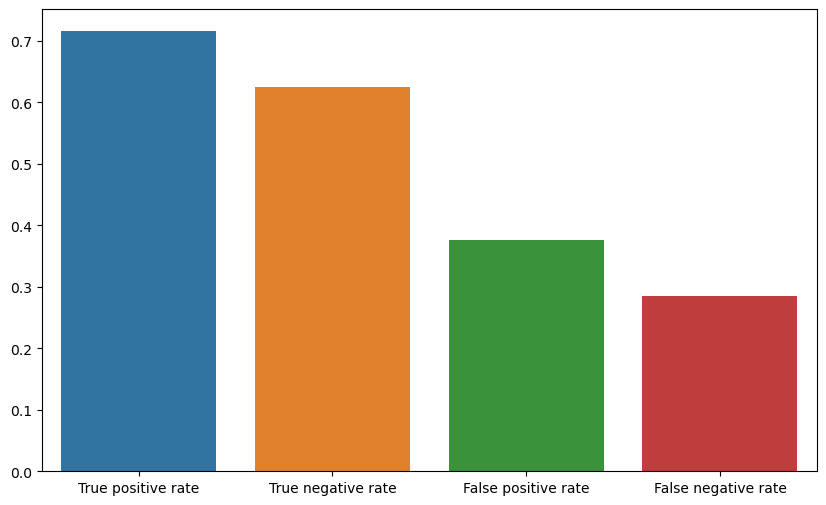

In [32]:
# Submit to site to have results for test data, here we can see the accuracy of the model on train
# Say that S = positive and B = negative
y_p = predict_labels(w_mse_gd, train_X)
def accuracy(y, y_pred):
    return np.sum(y == y_pred)/y.shape[0]
print('Accuracy for MSE GD: ', accuracy(train_y, y_p))
y = train_y
true_pos = np.sum((y_p == 1) & (y == 1))
true_neg = np.sum((y_p == -1) & (y == -1))
false_pos = np.sum((y_p == 1) & (y == -1))
false_neg = np.sum((y_p == -1) & (y == 1))
print(true_pos, true_neg, false_pos, false_neg)
tp_rate = true_pos/(true_pos + false_neg)
tn_rate = true_neg/(true_neg + false_pos)
fp_rate = false_pos/(false_pos + true_neg)
fn_rate = false_neg/(false_neg + true_pos)
plt.figure(figsize=(10, 6))
f = sns.barplot(x=['True positive rate', 'True negative rate', 'False positive rate', 'False negative rate'], y=[tp_rate, tn_rate, fp_rate, fn_rate])

<AxesSubplot:>

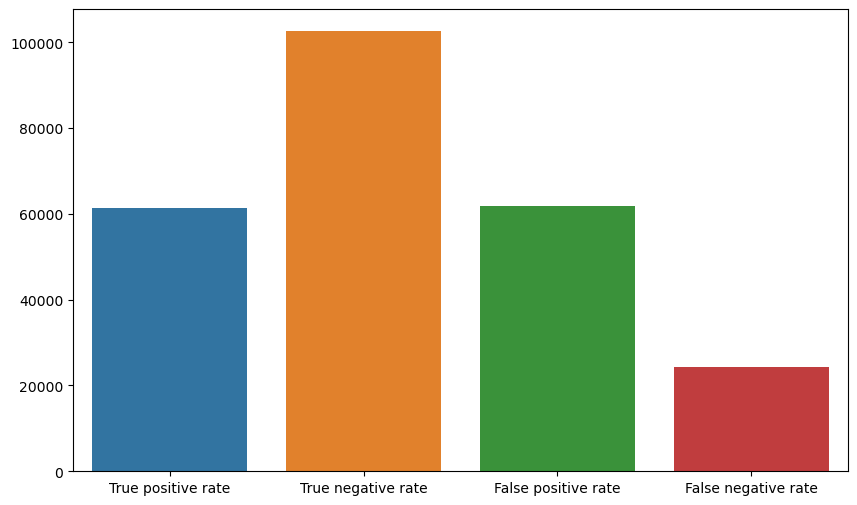

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['True positive', 'True negative', 'False positive', 'False negative'], y=[true_pos, true_neg, false_pos, false_neg])
tp_rate = true_pos/(true_pos + false_neg)
tn_rate = true_neg/(true_neg + false_pos)
fp_rate = false_pos/(false_pos + true_neg)
fn_rate = false_neg/(false_neg + true_pos)
sns.barplot(x=['True positive rate', 'True negative rate', 'False positive rate', 'False negative rate'], y=[tp_rate, tn_rate, fp_rate, fn_rate])

In [83]:
# Let's use the new helpers from scratch
from helpers import * # just in case so we don't have to restart the kernel


In [161]:
# magic cuz im lazy
def plot_magic(y, x, w, method_name, ax_=None):
    if(method_name.lower() == 'logistic'):
        y_p = predeict_labels_logistic(w, x)
    else: 
        y_p = predict_labels(w, x)
    f = sns.heatmap(confusion_matrix_ratio(y, y_p), annot=True, fmt='.2f', cmap='Blues', cbar=False, xticklabels=['S', 'B'], yticklabels=['S', 'B'], annot_kws={"size": 20} , ax=ax_)
    f.set_title('Confusion matrix - ' + method_name, fontsize=20, pad=20)
    f.set_xlabel('Predicted label')
    f.set_ylabel('True label')
    #plt.show()

Number of samples: 250000
Number of features: 30
Number of positives: 85667
Number of negatives: 164333
Ratio of positives: 0.342668
Ratio of negatives: 0.657332
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0


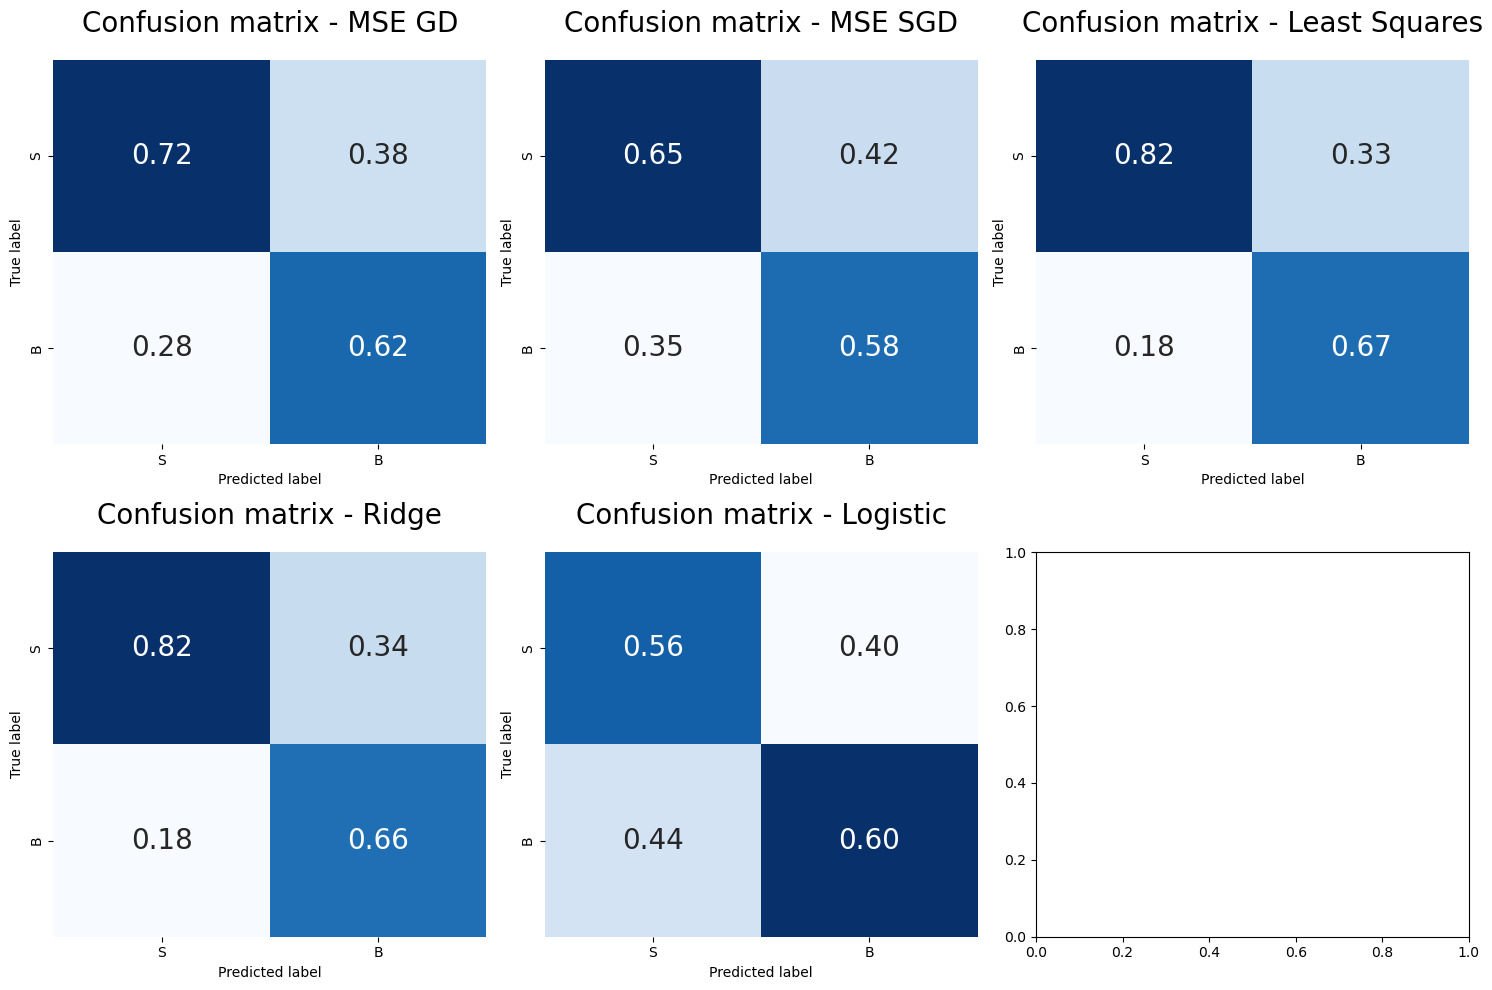

In [122]:

print_data_statistics(train_y, train_X)

f, ax = plt.subplots(figsize=(15,10), nrows=2, ncols=3)
plot_magic(train_y, train_X, w_mse_gd, 'MSE GD', ax[0, 0])
plot_magic(train_y, train_X, w_mse_sgd, 'MSE SGD', ax[0, 1])
plot_magic(train_y, train_X, w_least_squares, 'Least Squares',  ax[0, 2])
plot_magic(train_y, train_X, w_ridge, 'Ridge', ax[1, 0])
plot_magic(train_y, train_X, w_logistic, 'Logistic', ax[1, 1])
f.set_tight_layout(True)

plt.tight_layout()
plt.savefig('confusion_matrices_train.png')
plt.show()


In [136]:
# Let's now train more properly the data
y_train, x_train, y_test, x_test = partition(train_y, train_X, 0.8)
max_iters = 1000
gamma = 0.001
lambda_ = 0.001
print('X: {}, Y: {}'.format(x_train.shape, y_train.shape))
w_initial = np.zeros(x_train.shape[1])
w_mse_gd, loss_mse_gd = mean_squared_error_gd(y_train, x_train, w_initial, max_iters, gamma)
w_mse_sgd, loss_mse_sgd = mean_squared_error_sgd(y_train, x_train, w_initial, max_iters, gamma)
w_least_squares, loss_least_squares = least_squares(y_train, x_train)
w_ridge, loss_ridge = ridge_regression(y_train, x_train, lambda_)
w_logistic, loss_logistic = safe_logistic_regression(y_train, x_train, w_initial, max_iters, gamma)

X: (200000, 30), Y: (200000,)
w: [ 0.07664797 -0.14119034 -0.01465665  0.0407531   0.0033154   0.04815575
  0.00242618  0.04893399 -0.03562006  0.00917788 -0.0755825   0.0886478
  0.00306883  0.09069855 -0.0007588  -0.00236213  0.00175277 -0.00041392
  0.00219177  0.00119841  0.00180772 -0.00535458 -0.01810729  0.00852525
  0.00727348  0.0072758   0.00206323  0.003002    0.00299249 -0.01029916], loss: 0.4172588582851756
w: [ 0.10124915 -0.14079919 -0.01692153  0.03998004  0.00963478  0.05121463
  0.00889076  0.05447578 -0.02837324  0.01130565 -0.09015633  0.09595087
  0.00940215  0.0660187   0.00498323  0.00979543 -0.00957423 -0.00638909
 -0.01629187  0.01297074  0.00515104  0.00467883 -0.02318704  0.00477301
  0.00025597  0.00014979  0.00773321  0.00940031  0.00933711  0.00040582], loss: 0.41968705364998243
w: [ 2.93811495e-02 -2.50868865e-01 -2.53784811e-01 -2.76668075e-02
 -1.88474188e+00  3.06633405e-01 -1.04102158e+01  2.68502706e-01
 -2.28187238e-03 -6.29313837e+02 -1.81131390e-0

Number of samples: 200000
Number of features: 30
Number of positives: 68437
Number of negatives: 131563
Ratio of positives: 0.342185
Ratio of negatives: 0.657815
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0


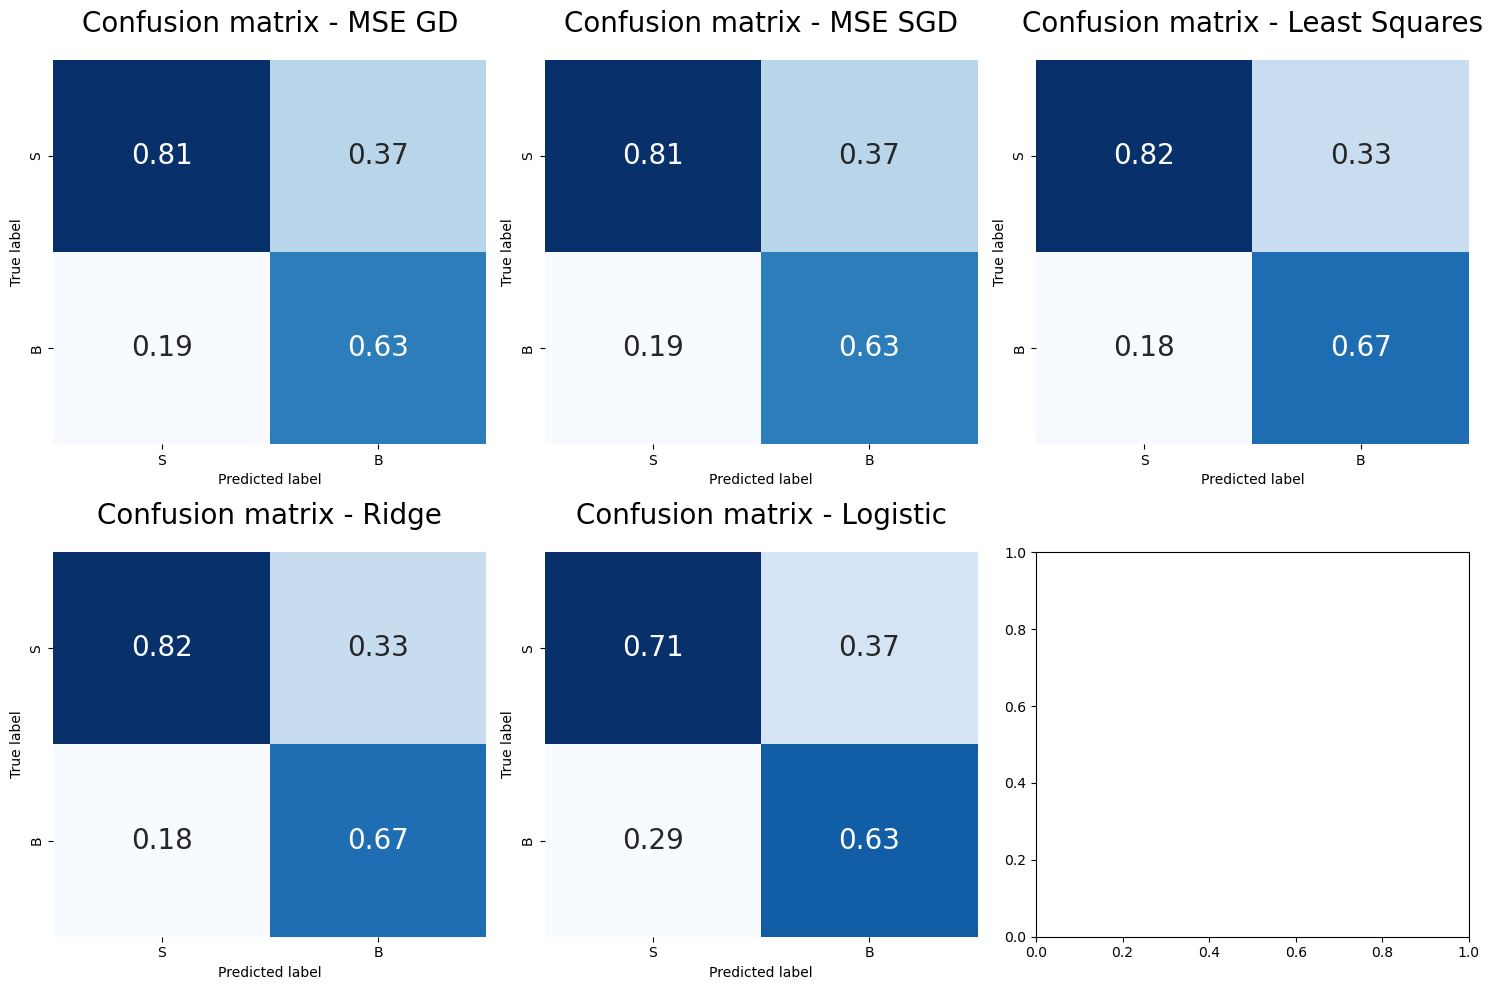

In [137]:
print_data_statistics(y_train, x_train)

f, ax = plt.subplots(figsize=(15,10), nrows=2, ncols=3)
plot_magic(y_train, x_train, w_mse_gd, 'MSE GD', ax[0, 0])
plot_magic(y_train, x_train, w_mse_sgd, 'MSE SGD', ax[0, 1])
plot_magic(y_train, x_train, w_least_squares, 'Least Squares',  ax[0, 2])
plot_magic(y_train, x_train, w_ridge, 'Ridge', ax[1, 0])
plot_magic(y_train, x_train, w_logistic, 'Logistic', ax[1, 1])
f.set_tight_layout(True)

plt.tight_layout()
plt.savefig('confusion_matrices_train_split_8.png')
plt.show()

Number of samples: 50000
Number of features: 30
Number of positives: 17230
Number of negatives: 32770
Ratio of positives: 0.3446
Ratio of negatives: 0.6554
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0


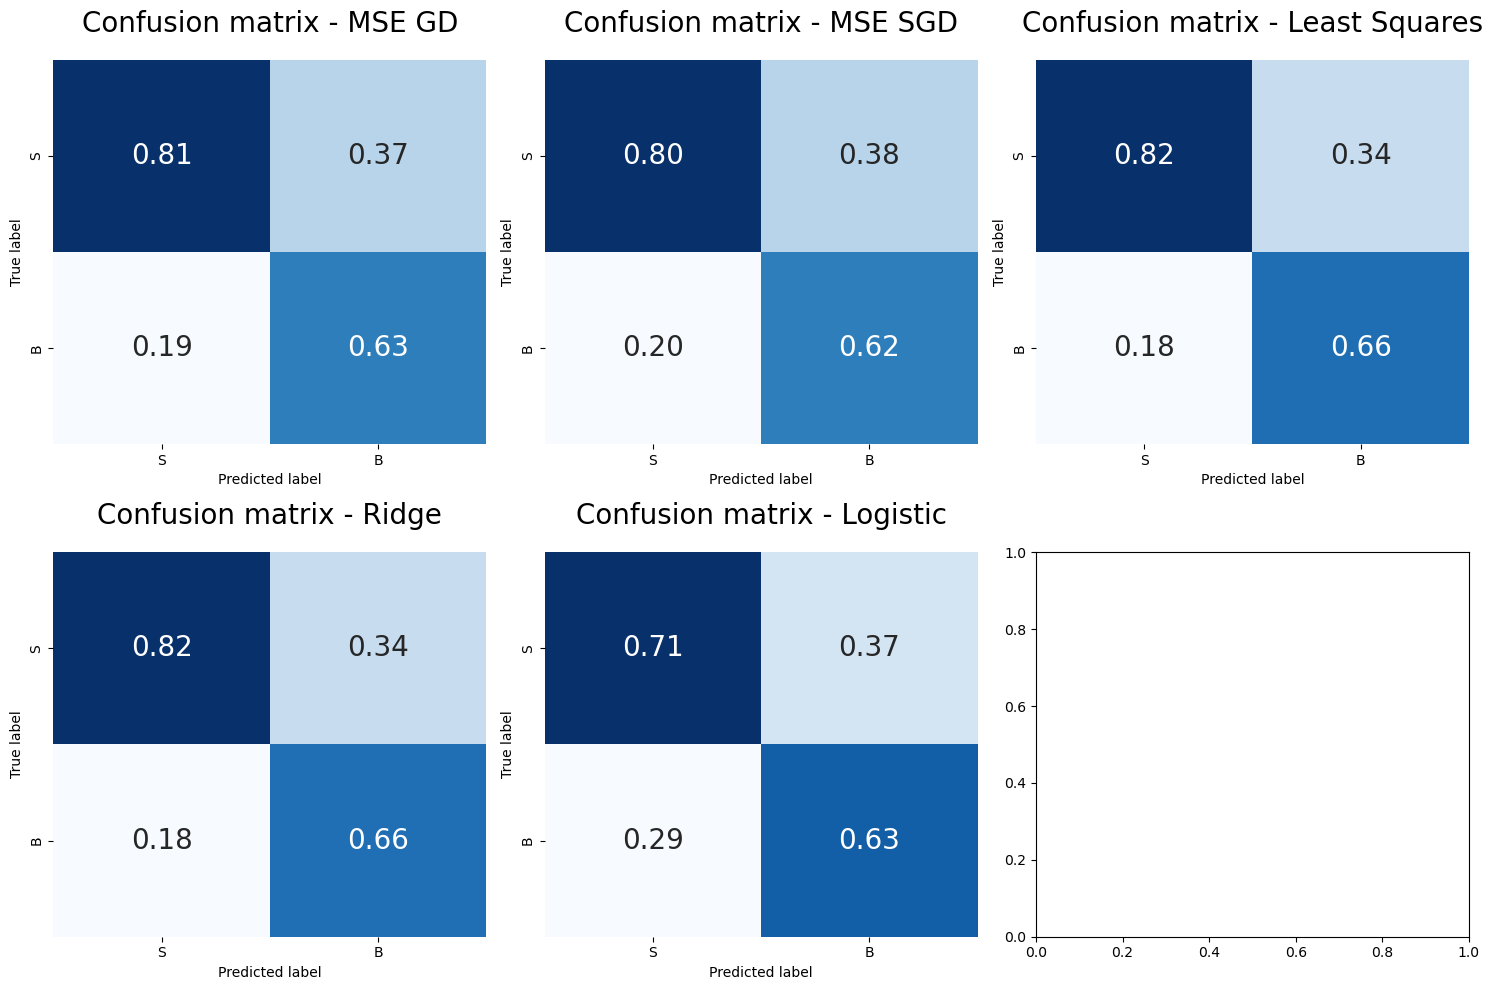

In [138]:
print_data_statistics(y_test, x_test)

f, ax = plt.subplots(figsize=(15,10), nrows=2, ncols=3)
plot_magic(y_test, x_test, w_mse_gd, 'MSE GD', ax[0, 0])
plot_magic(y_test, x_test, w_mse_sgd, 'MSE SGD', ax[0, 1])
plot_magic(y_test, x_test, w_least_squares, 'Least Squares',  ax[0, 2])
plot_magic(y_test, x_test, w_ridge, 'Ridge', ax[1, 0])
plot_magic(y_test, x_test, w_logistic, 'Logistic', ax[1, 1])
f.set_tight_layout(True)

plt.tight_layout()
plt.savefig('confusion_matrices_test_split_8.png')
plt.show()

In [166]:
# Let's have a super lazy big view of the whole thing
def train_huge_magic_plot(x, y, x_test_=None, y_test_=None, method='all', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=0.8, plot=True, normalize=True, poly_exp=False, degree=2):
    w_initial = np.zeros(x.shape[1]) if w_initial is None else w_initial
    w = w_initial
    
    if(poly_exp):
        w_initial = np.zeros(x.shape[1] * degree)
        w = w_initial
        x = polynomial_expansion(x, degree)
        
    if(normalize):
        x = standardize(x)
    if(split != 1):
        y_train, x_train, y_test, x_test = partition(y, x, split)
    else:
        x_train, y_train = x, y
        x_test, y_test = x_train, y_train
        
    if(y_test_ is not None):
        y_test = y_test_
    else:
        y_test = y_test
    if(x_test_ is not None):
        x_test = x_test_
    else:
        x_test = x_test
    
    if(method.lower() == 'mse_gd'):
        w, loss = mean_squared_error_gd(y, x, w_initial, max_iters, gamma)
    elif(method.lower() == 'mse_sgd'):
        w, loss = mean_squared_error_sgd(y, x, w_initial, max_iters, gamma)
    elif(method.lower() == 'least_squares'):
        w, loss = least_squares(y, x)
    elif(method.lower() == 'ridge'):
        w, loss = ridge_regression(y, x, lambda_)
    elif(method.lower() == 'logistic'):
        w, loss = safe_logistic_regression(y, x, w_initial, max_iters, gamma)
    elif(method.lower() == 'all'):
        w_mse_gd, loss_mse_gd = mean_squared_error_gd(y, x, w_initial, max_iters, gamma)
        w_mse_sgd, loss_mse_sgd = mean_squared_error_sgd(y, x, w_initial, max_iters, gamma)
        w_least_squares, loss_least_squares = least_squares(y, x)
        w_ridge, loss_ridge = ridge_regression(y, x, lambda_)
        w_logistic, loss_logistic = safe_logistic_regression(y, x, w_initial, max_iters, gamma)
        #return w_mse_gd, loss_mse_gd, w_mse_sgd, loss_mse_sgd, w_least_squares, loss_least_squares, w_ridge, loss_ridge, w_logistic, loss_logistic
    else:
        raise ValueError('Invalid method name')
    if(plot & (method.lower() != 'all')):
        plot_magic(y, x, w, method)
    elif(plot & (method.lower() == 'all')):
        f, ax = plt.subplots(figsize=(15,10), nrows=2, ncols=3)
        plot_magic(y, x, w_mse_gd, 'MSE GD', ax[0, 0])
        plot_magic(y, x, w_mse_sgd, 'MSE SGD', ax[0, 1])
        plot_magic(y, x, w_least_squares, 'Least Squares',  ax[0, 2])
        plot_magic(y, x, w_ridge, 'Ridge', ax[1, 0])
        plot_magic(y, x, w_logistic, 'Logistic', ax[1, 1])
        f.set_tight_layout(True)
        plt.tight_layout()
        plt.savefig('confusion_matrices_{}{}_split_{:.0f}.png'.format(method, "_poly{}".format(degree) if poly_exp else "" ,split*100))
        plt.show()
    if(method != 'all'): return w , loss
    else: return w_mse_gd, loss_mse_gd, w_mse_sgd, loss_mse_sgd, w_least_squares, loss_least_squares, w_ridge, loss_ridge, w_logistic, loss_logistic

In [142]:
y, x, ids = load_csv_data('data/train.csv')

w: [ 0.05952096 -0.09923104 -0.00587925  0.02972936  0.0056301   0.02923215
  0.00515838  0.02709631 -0.02251744  0.01072419 -0.05717343  0.06253677
  0.00549935  0.06238702 -0.00071852 -0.00158798 -0.00875948 -0.00038724
  0.00137036 -0.0045297   0.00178041  0.00382782 -0.00423548  0.01162653
  0.01064808  0.01064802  0.00496326  0.00546415  0.00546049  0.00036636], loss: 0.42915491038793346
w: [ 0.08137998 -0.09320924  0.00872306  0.03068726 -0.00472713  0.03444953
 -0.00544055  0.04154944  0.00382293  0.02020813 -0.04548757  0.0728426
 -0.00490536  0.03878023  0.00391933 -0.02722176  0.00319782 -0.01981546
  0.01650564 -0.01146396  0.02722413 -0.00674752 -0.00147162  0.00971758
  0.00713751  0.00717929 -0.00505309 -0.00498487 -0.00501097  0.014268  ], loss: 0.4338977755608491
w: [ 2.93788276e-02 -2.52531474e-01 -2.54791125e-01 -3.03696825e-02
 -1.40144671e+00  2.95701639e-01 -1.07889472e+01  2.67880862e-01
 -2.44934958e-03 -3.28846725e+02 -1.82647888e-01  1.14039627e-01
  2.05045957

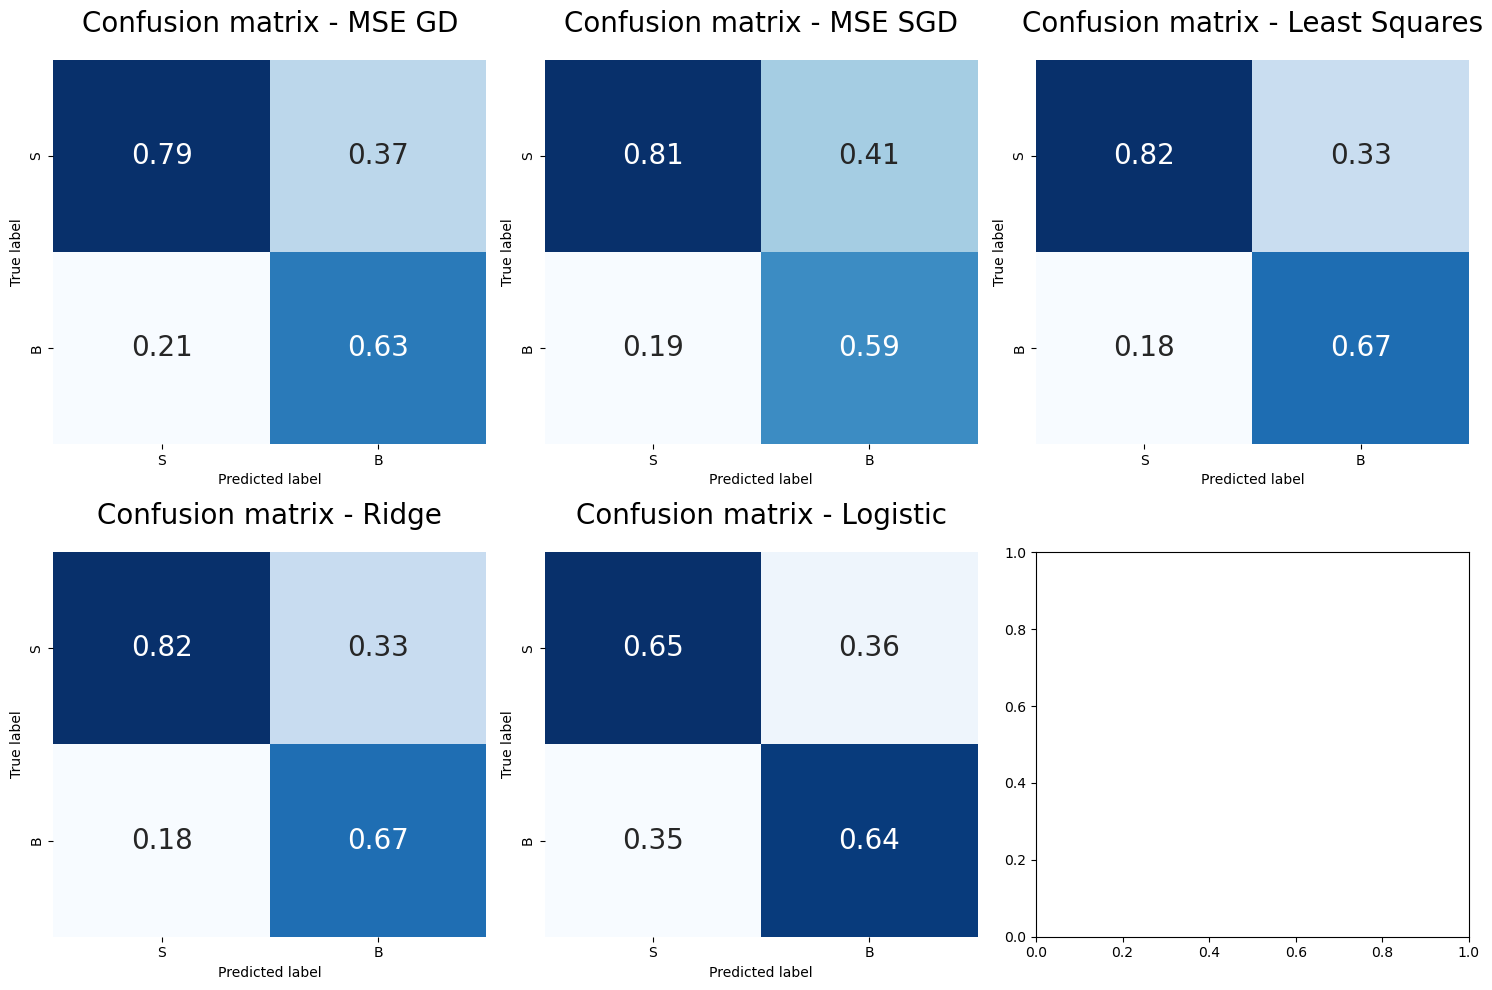

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.05952096, -0.09923104, -0.00587925,  0.02972936,  0.0056301 ,
         0.02923215,  0.00515838,  0.02709631, -0.02251744,  0.01072419,
        -0.05717343,  0.06253677,  0.00549935,  0.06238702, -0.00071852,
        -0.00158798, -0.00875948, -0.00038724,  0.00137036, -0.0045297 ,
         0.00178041,  0.00382782, -0.00423548,  0.01162653,  0.01064808,
         0.01064802,  0.00496326,  0.00546415,  0.00546049,  0.00036636]),
 0.42915491038793346,
 array([ 0.08137998, -0.09320924,  0.00872306,  0.03068726, -0.00472713,
         0.03444953, -0.00544055,  0.04154944,  0.00382293,  0.02020813,
        -0.04548757,  0.0728426 , -0.00490536,  0.03878023,  0.00391933,
        -0.02722176,  0.00319782, -0.01981546,  0.01650564, -0.01146396,
         0.02722413, -0.00674752, -0.00147162,  0.00971758,  0.00713751,
         0.00717929, -0.00505309, -

In [148]:
train_huge_magic_plot(x, y, method='all', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=0.8, plot=True, normalize=True, poly_exp=False, degree=2)

w: [ 0.04468636 -0.08420858 -0.00067879  0.02677399  0.00537575  0.02646796
  0.00494554  0.02486958 -0.01955057  0.01076025 -0.04841566  0.05654799
  0.00525617  0.05683908 -0.00073416 -0.00132558 -0.00237249 -0.00050186
  0.00111745  0.00018827  0.00161644  0.00331299 -0.00481917  0.00844639
  0.00744704  0.00744706  0.00479137  0.00522358  0.00521985  0.0002397
 -0.04583293 -0.03356752 -0.02234614  0.01460122 -0.00522137  0.03694746
 -0.00522067  0.01184385 -0.00158613 -0.00319207 -0.01658204  0.03056559
 -0.00522234  0.01881489 -0.03279209 -0.00077329  0.00319495 -0.04358611
 -0.00074579  0.00365944 -0.00051415 -0.00903217 -0.01614844 -0.00738784
 -0.00744606 -0.00744643 -0.00535593 -0.00522211 -0.00522237 -0.01294147], loss: 0.41648765291279904
w: [ 0.06000578 -0.07714396  0.0112314   0.02709168 -0.00059309  0.03018688
 -0.0012169   0.02850392  0.00755314  0.01870488 -0.04152545  0.06921838
 -0.0007502   0.03017771  0.00711856 -0.02659674  0.01083368 -0.01748103
  0.01629743 -0.00

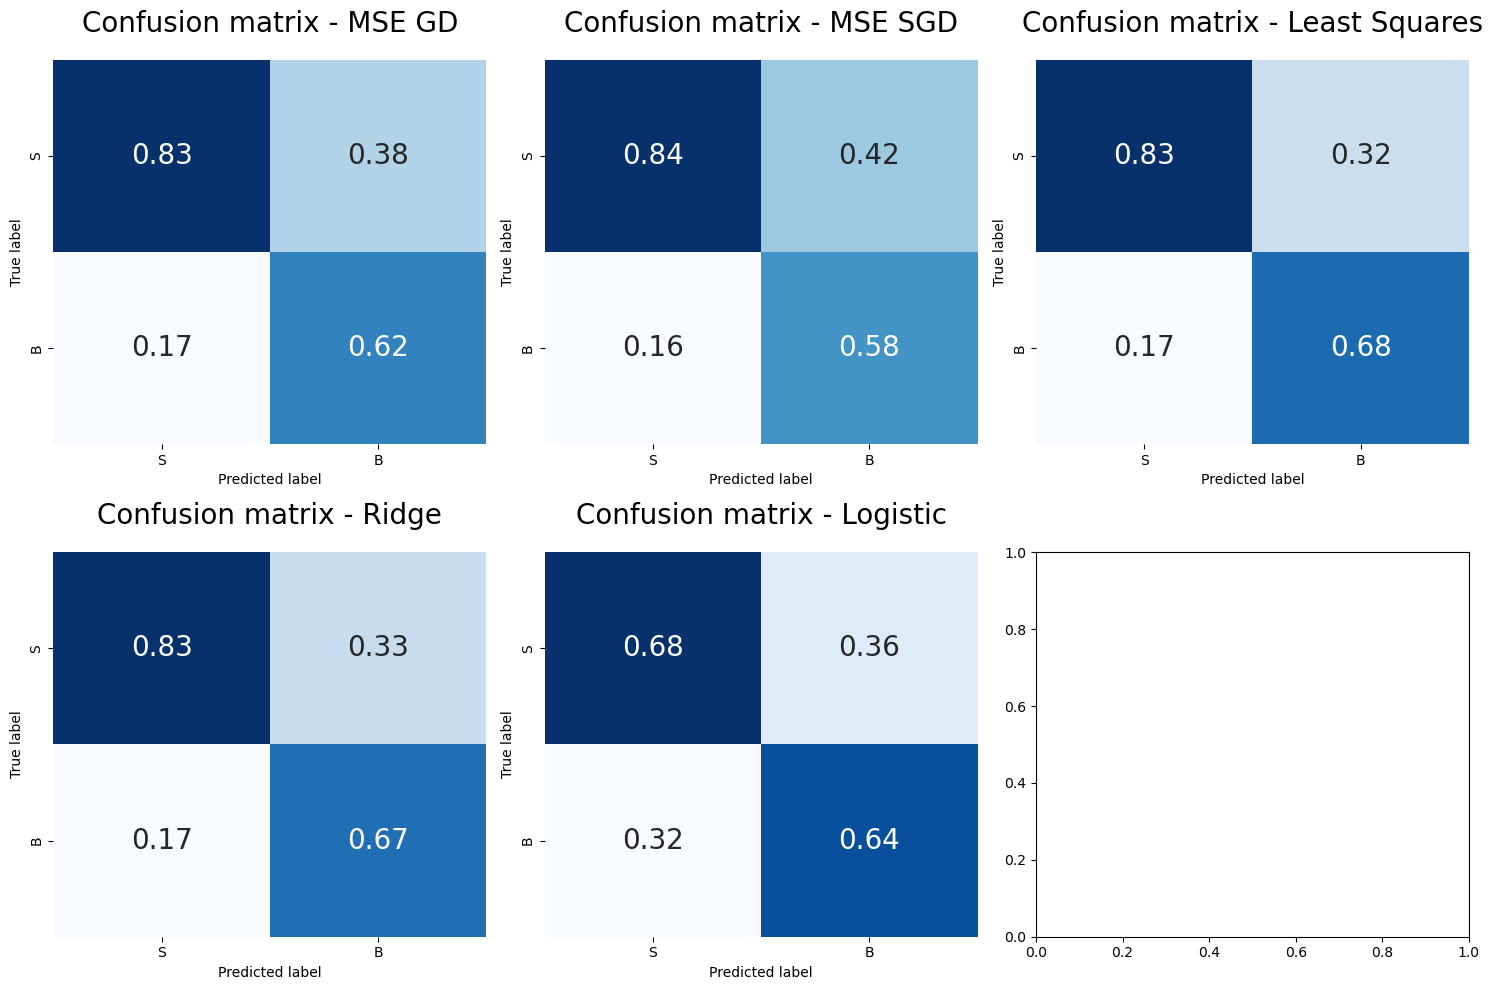

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.04468636, -0.08420858, -0.00067879,  0.02677399,  0.00537575,
         0.02646796,  0.00494554,  0.02486958, -0.01955057,  0.01076025,
        -0.04841566,  0.05654799,  0.00525617,  0.05683908, -0.00073416,
        -0.00132558, -0.00237249, -0.00050186,  0.00111745,  0.00018827,
         0.00161644,  0.00331299, -0.00481917,  0.00844639,  0.00744704,
         0.00744706,  0.00479137,  0.00522358,  0.00521985,  0.0002397 ,
        -0.04583293, -0.03356752, -0.02234614,  0.01460122, -0.00522137,
         0.03694746, -0.00522067,  0.01184385, -0.00158613, -0.00319207,
        -0.01658204,  0.03056559, -0.00522234,  0.01881489, -0.03279209,
        -0.00077329,  0.00319495, -0.04358611, -0.00074579,  0.003659

In [157]:
train_huge_magic_plot(x, y, method='all', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=0.8, plot=True, normalize=True, poly_exp=True, degree=2)

w: [ 1.42698983e-02 -7.08440598e-02  6.42837924e-03  2.15612419e-02
  1.77610284e-03  2.03248272e-02  1.40090601e-03  2.25758911e-02
 -1.07539547e-02  1.21910577e-02 -4.70009593e-02  3.16996537e-02
  1.67225994e-03  5.40214097e-02 -7.31773680e-04 -8.55427788e-04
 -4.69165826e-03 -3.88475703e-04  8.70668062e-04  8.31794254e-03
  1.26232245e-03  3.64045345e-03 -3.12835675e-03  1.64675873e-03
  4.45063053e-04  4.45418125e-04  1.52211298e-03  1.64369013e-03
  1.63950861e-03  3.09511125e-03 -1.37798764e-02 -2.70636897e-02
 -1.24825415e-02  1.34599706e-02 -1.64133538e-03  3.11438199e-02
 -1.64076572e-03  1.32233077e-02 -4.29157152e-04  2.32178282e-03
 -1.76120463e-02  1.98102672e-02 -1.64217452e-03  1.88771923e-02
 -1.62503300e-02 -6.52163706e-04  2.00406005e-04 -2.36204617e-02
 -4.01539540e-04  4.92283196e-03 -1.33708475e-04 -3.96167360e-03
 -6.64655027e-03 -2.82976428e-04 -4.43977581e-04 -4.44323831e-04
 -1.70181773e-03 -1.64198182e-03 -1.64220757e-03 -4.85573393e-03
  1.17391668e-02  3.45

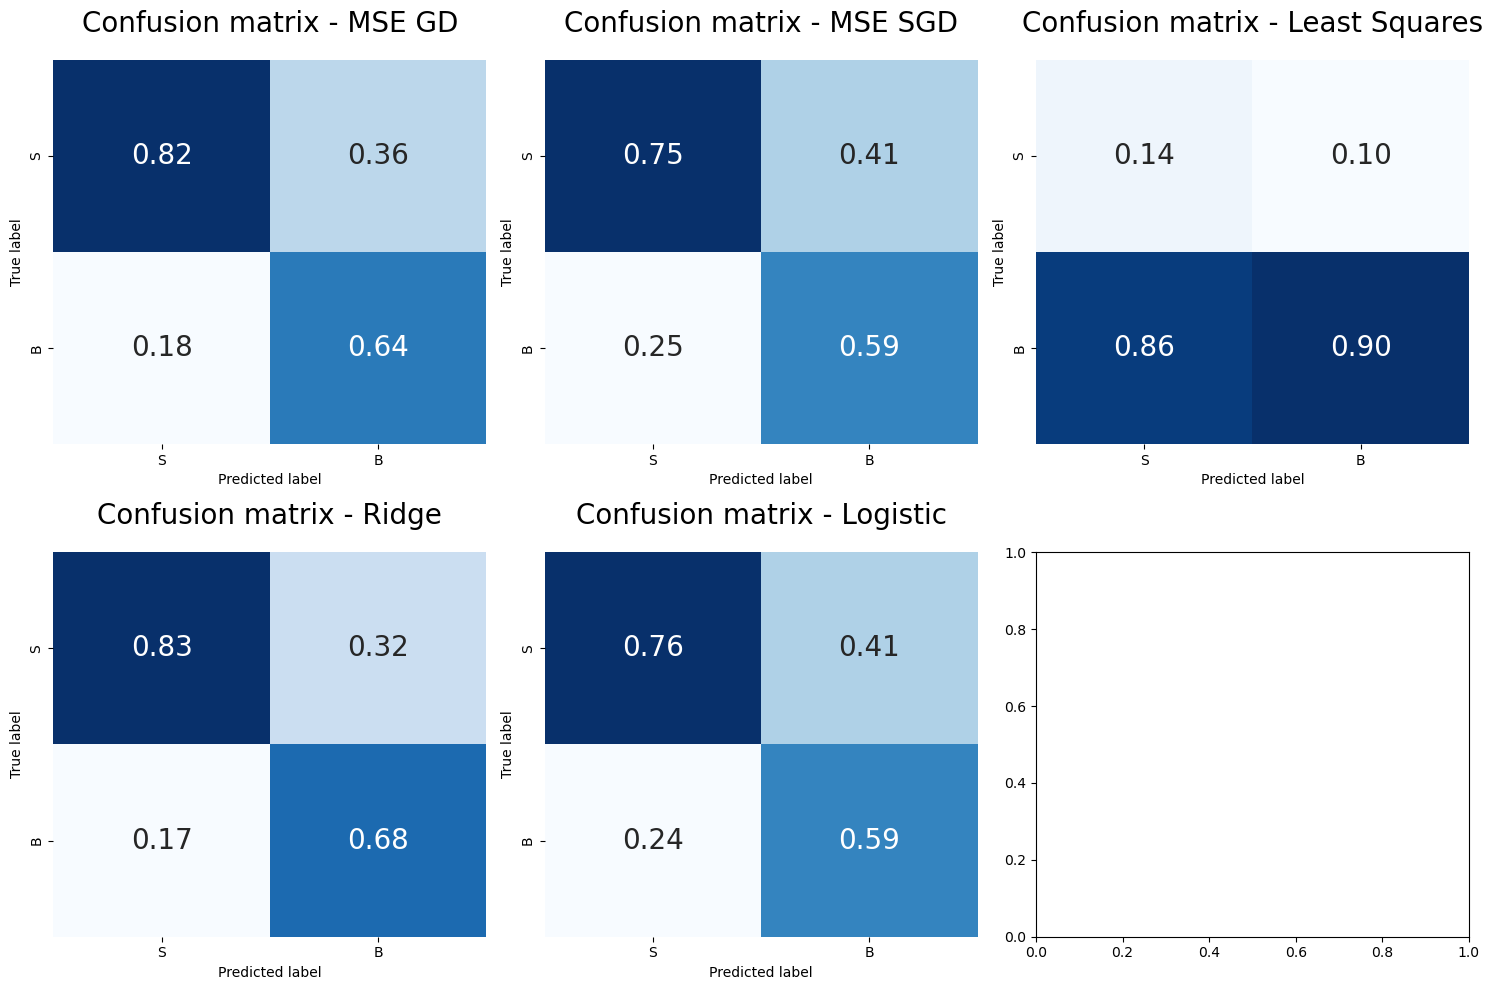

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [158]:
train_huge_magic_plot(x, y, method='all', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=0.8, plot=True, normalize=True, poly_exp=True, degree=10)

w: [ 3.61051507e+36  3.80238453e+37 -9.76611943e+36 -1.15635158e+38
  2.28363975e+38  1.54938266e+35  9.74574401e+36 -2.22685075e+33
 -2.11712471e+33 -9.59792675e+39  3.52538378e+33  1.22664399e+33
 -4.16131225e+37  1.85910453e+39  6.11773069e+32  9.96456273e+30
  1.83030530e+39  1.30417586e+33  1.53722200e+31  4.07257883e+33
 -1.13209558e+32  3.81910856e+33 -4.37516874e+38 -1.77685072e+35
 -2.29831796e+36  2.44504805e+36 -1.65909738e+35 -1.17488308e+36
 -9.12000346e+36  8.13051533e+39 -1.18422914e+34 -1.65975366e+32
  5.81430390e+31 -2.37611889e+32 -7.30514876e+38  1.06707550e+32
  1.46836621e+38  5.89519359e+30  4.08108788e+30 -3.12689179e+31
 -1.89497474e+31  7.97539304e+30  1.07448952e+39 -4.37688487e+30
  1.09049806e+30 -1.89978161e+30  6.42382324e+30 -1.51041324e+30
 -2.57869998e+30 -3.56719254e+31 -2.45151974e+30  1.37815665e+31
 -7.24874755e+38  9.03396849e+32 -2.09989332e+37 -2.61183122e+36
 -1.37837150e+32 -1.80290401e+37  5.10432337e+36  8.36990089e+30
  8.23899715e+31  7.21

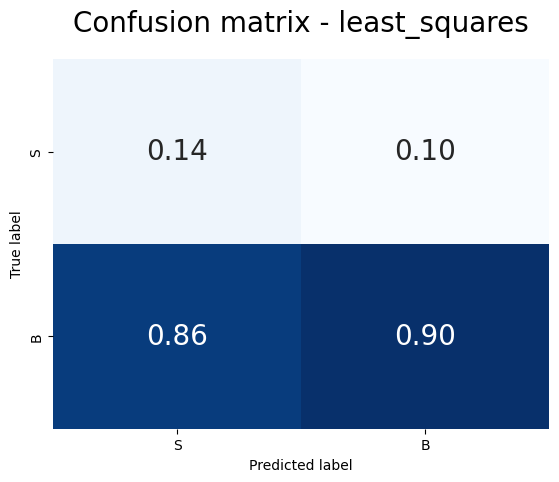

In [167]:
w, loss = train_huge_magic_plot(x, y, method='least_squares', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=1, plot=True, normalize=True, poly_exp=True, degree=10)

w: [ 8.07556767e-03 -6.91038742e-02  6.46360646e-03  2.09986451e-02
  9.02257633e-04  1.91987795e-02  5.35137543e-04  2.09953846e-02
 -8.29611103e-03  1.29190500e-02 -4.68677909e-02  2.76513054e-02
  8.01002772e-04  5.34928953e-02 -7.30002794e-04 -8.54031641e-04
 -5.17468882e-03 -3.03616734e-04  9.59991548e-04  1.01125001e-02
  1.30392873e-03  3.98701194e-03 -1.38428585e-03  1.34878944e-03
  1.68536896e-04  1.68994678e-04  7.10151081e-04  7.73200159e-04
  7.68778908e-04  4.18408298e-03 -7.51198558e-03 -2.57584934e-02
 -1.22128291e-02  1.32973926e-02 -7.70697532e-04  3.11033415e-02
 -7.70140275e-04  1.18231434e-02  7.21866572e-05  3.14827496e-03
 -1.76166260e-02  1.70593868e-02 -7.71517622e-04  1.86235545e-02
 -1.52477645e-02 -7.06526562e-04 -1.45930165e-04 -2.23451032e-02
 -3.97096525e-04  5.35309331e-03  2.19317802e-05 -3.25392021e-03
 -2.93520367e-03 -2.18816531e-05 -1.67519881e-04 -1.67863241e-04
 -8.24300321e-04 -7.71330885e-04 -7.71550163e-04 -3.71227700e-03
  5.48523799e-03  3.77

(array([ 8.07556767e-03, -6.91038742e-02,  6.46360646e-03,  2.09986451e-02,
         9.02257633e-04,  1.91987795e-02,  5.35137543e-04,  2.09953846e-02,
        -8.29611103e-03,  1.29190500e-02, -4.68677909e-02,  2.76513054e-02,
         8.01002772e-04,  5.34928953e-02, -7.30002794e-04, -8.54031641e-04,
        -5.17468882e-03, -3.03616734e-04,  9.59991548e-04,  1.01125001e-02,
         1.30392873e-03,  3.98701194e-03, -1.38428585e-03,  1.34878944e-03,
         1.68536896e-04,  1.68994678e-04,  7.10151081e-04,  7.73200159e-04,
         7.68778908e-04,  4.18408298e-03, -7.51198558e-03, -2.57584934e-02,
        -1.22128291e-02,  1.32973926e-02, -7.70697532e-04,  3.11033415e-02,
        -7.70140275e-04,  1.18231434e-02,  7.21866572e-05,  3.14827496e-03,
        -1.76166260e-02,  1.70593868e-02, -7.71517622e-04,  1.86235545e-02,
        -1.52477645e-02, -7.06526562e-04, -1.45930165e-04, -2.23451032e-02,
        -3.97096525e-04,  5.35309331e-03,  2.19317802e-05, -3.25392021e-03,
        -2.9

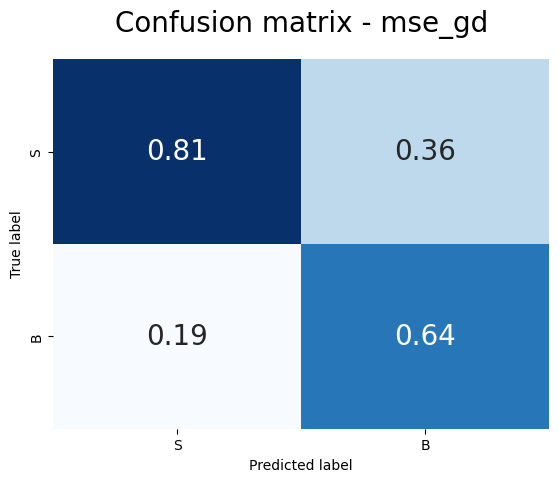

In [169]:
train_huge_magic_plot(x, y, method='mse_gd', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=0.8, plot=True, normalize=True, poly_exp=True, degree=20)

w: [ 2.52754871e-02 -7.53410021e-02  2.77707982e-03  2.23290738e-02
  3.00236174e-03  2.20139259e-02  2.61078159e-03  2.38185981e-02
 -1.53776790e-02  1.11541466e-02 -4.79810732e-02  3.87576265e-02
  2.89375601e-03  5.56975209e-02 -7.30524149e-04 -1.00277842e-03
 -3.74072107e-03 -5.22297599e-04  8.89231030e-04  4.70486197e-03
  1.28995197e-03  3.04279805e-03 -5.65968193e-03  2.63001981e-03
  1.43934238e-03  1.43966466e-03  2.64250812e-03  2.86349978e-03
  2.85970899e-03  1.27372450e-03 -2.57374119e-02 -2.96359046e-02
 -1.71046378e-02  1.35929510e-02 -2.86137016e-03  3.11954894e-02
 -2.86078203e-03  1.24484800e-02 -1.21891840e-03  9.75469685e-04
 -1.76366327e-02  2.66247795e-02 -2.86224586e-03  1.96028981e-02
 -2.42999379e-02 -6.70716247e-04  1.32809058e-03 -3.33141326e-02
 -5.80582021e-04  4.16362040e-03 -4.36908222e-04 -5.23983010e-03
 -1.24558326e-02 -1.26605034e-03 -1.43827713e-03 -1.43862886e-03
 -2.93236639e-03 -2.86204304e-03 -2.86227990e-03 -6.82084694e-03
  2.31293559e-02  4.02

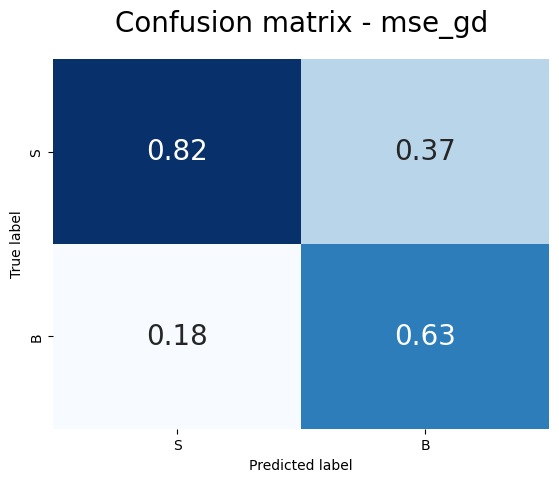

In [173]:
w, loss = train_huge_magic_plot(x, y, method='mse_gd', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=0.8, plot=True, normalize=True, poly_exp=True, degree=5)

w: [ 2.71773248e-02 -6.36394441e-02  1.64375445e-02  2.80652098e-02
 -4.89742993e-04  2.74147409e-02 -1.08813672e-03  1.72827130e-02
  8.06710678e-03  2.21108309e-02 -4.20762226e-02  4.98194314e-02
 -6.46531870e-04  3.39775182e-02  5.08991549e-04 -2.83044976e-02
  1.76539264e-02 -2.09306973e-02  1.52506312e-02  7.55985164e-03
  1.27671281e-02 -9.24104200e-03 -3.29176762e-04  5.22486846e-03
  3.05270664e-03  3.09049562e-03 -4.24107447e-04 -7.00014417e-04
 -7.68624566e-04  1.43579834e-02 -2.64268490e-02 -3.71948225e-02
 -2.80179253e-03  2.61404173e-03  6.81778991e-04  3.24397421e-02
  6.82068593e-04  4.81060969e-03  4.25681547e-03  5.83435684e-04
 -1.81970450e-02  2.46918290e-02  6.80582190e-04 -3.62150088e-02
 -3.67870437e-02 -3.58954159e-04  1.16574744e-02 -3.05319852e-02
 -1.05767305e-02  3.46416843e-03 -9.60595922e-03 -2.10658468e-02
 -2.69830812e-03 -3.39290093e-03 -3.15103229e-03 -3.15120234e-03
  7.46765306e-04  6.80822014e-04  6.80578831e-04  3.08354622e-03
  2.57130780e-02 -1.03

(array([ 2.71773248e-02, -6.36394441e-02,  1.64375445e-02,  2.80652098e-02,
        -4.89742993e-04,  2.74147409e-02, -1.08813672e-03,  1.72827130e-02,
         8.06710678e-03,  2.21108309e-02, -4.20762226e-02,  4.98194314e-02,
        -6.46531870e-04,  3.39775182e-02,  5.08991549e-04, -2.83044976e-02,
         1.76539264e-02, -2.09306973e-02,  1.52506312e-02,  7.55985164e-03,
         1.27671281e-02, -9.24104200e-03, -3.29176762e-04,  5.22486846e-03,
         3.05270664e-03,  3.09049562e-03, -4.24107447e-04, -7.00014417e-04,
        -7.68624566e-04,  1.43579834e-02, -2.64268490e-02, -3.71948225e-02,
        -2.80179253e-03,  2.61404173e-03,  6.81778991e-04,  3.24397421e-02,
         6.82068593e-04,  4.81060969e-03,  4.25681547e-03,  5.83435684e-04,
        -1.81970450e-02,  2.46918290e-02,  6.80582190e-04, -3.62150088e-02,
        -3.67870437e-02, -3.58954159e-04,  1.16574744e-02, -3.05319852e-02,
        -1.05767305e-02,  3.46416843e-03, -9.60595922e-03, -2.10658468e-02,
        -2.6

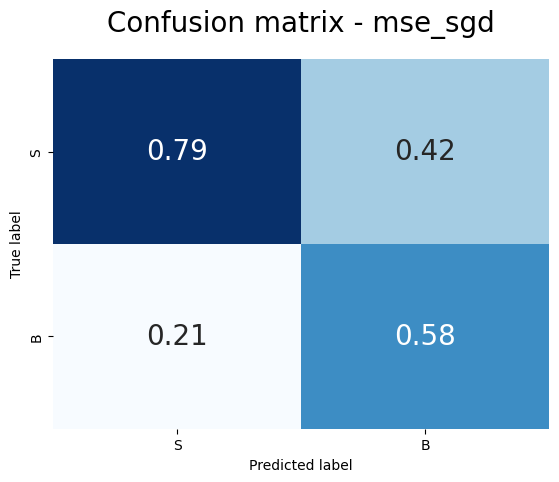

In [174]:
train_huge_magic_plot(x, y, method='mse_sgd', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=0.9, plot=True, normalize=True, poly_exp=True, degree=6)

w: [ 3.32250795e+00 -3.72843058e-01 -3.27481939e-01 -7.25982722e-02
 -6.73367452e+01 -9.45252626e-01 -2.82159224e+01  4.08688097e-01
 -4.49401479e-02 -2.99917760e+02 -4.68224753e-01 -8.50878348e-02
 -2.17633654e+01  5.86380396e+01 -2.67265570e-03  2.04387952e-03
  5.76945169e+01  1.85294261e-03  7.55034059e-03 -7.33703254e-02
  1.42378795e-03  2.57878805e-01  2.61179021e+05  5.20609719e+00
 -1.54205984e+00  7.60962144e-02  3.14499311e+00  1.68775781e+00
 -2.63111420e+00  2.53972657e+02 -6.27026880e+00  2.22371398e-01
 -2.95698232e-02  5.44157239e-01  1.26950517e+04  7.83045105e-01
 -9.77901131e+02  8.13046299e-01  3.28983754e-01  5.71763802e-01
  7.78396737e-01 -9.47376521e-03  1.75262770e+05 -9.05463353e-01
 -3.25794495e-02 -6.35344243e-03 -8.20363317e-01 -6.91108233e-02
 -1.72002523e-03  6.62445975e-01  5.78278525e-03 -6.77748605e-01
 -1.21871365e+05 -2.81358490e+01  2.00319349e+04  7.85420379e+01
 -8.08368633e+00  1.65190934e+04 -8.78846732e+02 -4.76524694e-01
 -2.63564189e+00  6.29

(array([ 3.32250795e+00, -3.72843058e-01, -3.27481939e-01, -7.25982722e-02,
        -6.73367452e+01, -9.45252626e-01, -2.82159224e+01,  4.08688097e-01,
        -4.49401479e-02, -2.99917760e+02, -4.68224753e-01, -8.50878348e-02,
        -2.17633654e+01,  5.86380396e+01, -2.67265570e-03,  2.04387952e-03,
         5.76945169e+01,  1.85294261e-03,  7.55034059e-03, -7.33703254e-02,
         1.42378795e-03,  2.57878805e-01,  2.61179021e+05,  5.20609719e+00,
        -1.54205984e+00,  7.60962144e-02,  3.14499311e+00,  1.68775781e+00,
        -2.63111420e+00,  2.53972657e+02, -6.27026880e+00,  2.22371398e-01,
        -2.95698232e-02,  5.44157239e-01,  1.26950517e+04,  7.83045105e-01,
        -9.77901131e+02,  8.13046299e-01,  3.28983754e-01,  5.71763802e-01,
         7.78396737e-01, -9.47376521e-03,  1.75262770e+05, -9.05463353e-01,
        -3.25794495e-02, -6.35344243e-03, -8.20363317e-01, -6.91108233e-02,
        -1.72002523e-03,  6.62445975e-01,  5.78278525e-03, -6.77748605e-01,
        -1.2

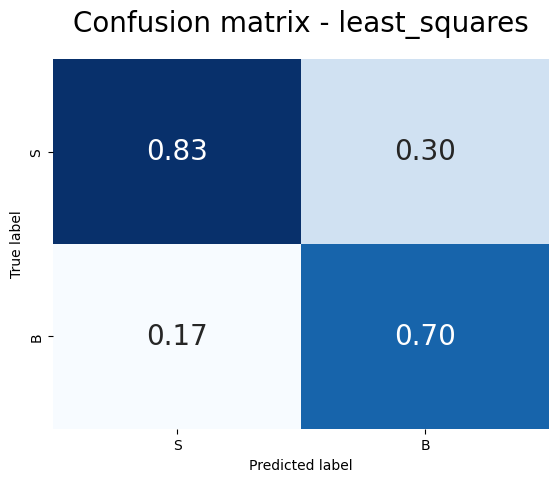

In [179]:
train_huge_magic_plot(x, y, method='least_squares', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=0.8, plot=True, normalize=True, poly_exp=True, degree=4)

w: [ 1.17299285e+01  1.42135773e-01  3.10071614e-01 -2.28909451e-01
 -4.66038944e+01 -2.22686467e+00 -2.62256913e+01 -1.81997647e+00
 -1.82326501e-02 -2.60560717e+02 -3.06206440e-01 -1.77763716e-01
  1.54319284e+02  5.14324121e+01 -7.81648273e-04 -2.16312231e-03
  5.01927664e+01  1.03083626e-03  7.16004129e-03 -2.62860907e-01
 -2.02531093e-03  3.73084475e-01 -1.96490366e+05  8.92453333e+00
  1.74711566e+00 -6.37311365e-01  5.85957996e+00  4.13167528e-01
 -1.11958123e+00  2.20490866e+02 -4.79464908e+01 -1.88881268e+00
 -2.19865771e+00  1.01597422e+00  8.18567044e+03  3.50788058e+00
 -8.32887240e+02  9.46180252e+00 -3.26417278e-01  2.19709977e+00
  1.06147165e+00  1.16881915e-02 -5.83130052e+03 -2.45326700e+00
  9.61867183e-04 -1.91962550e-03 -2.04539487e+00 -5.58492753e-02
  3.72805867e-03  3.87574963e+00 -5.47832333e-03 -1.10181445e+00
  3.54535451e+04 -8.40681227e+01  1.95269490e+04  1.42060414e+01
 -3.17745994e+01  1.61427243e+04 -6.67539028e+02 -1.32627992e+00
  7.04234859e+01  6.02

(array([ 1.17299285e+01,  1.42135773e-01,  3.10071614e-01, -2.28909451e-01,
        -4.66038944e+01, -2.22686467e+00, -2.62256913e+01, -1.81997647e+00,
        -1.82326501e-02, -2.60560717e+02, -3.06206440e-01, -1.77763716e-01,
         1.54319284e+02,  5.14324121e+01, -7.81648273e-04, -2.16312231e-03,
         5.01927664e+01,  1.03083626e-03,  7.16004129e-03, -2.62860907e-01,
        -2.02531093e-03,  3.73084475e-01, -1.96490366e+05,  8.92453333e+00,
         1.74711566e+00, -6.37311365e-01,  5.85957996e+00,  4.13167528e-01,
        -1.11958123e+00,  2.20490866e+02, -4.79464908e+01, -1.88881268e+00,
        -2.19865771e+00,  1.01597422e+00,  8.18567044e+03,  3.50788058e+00,
        -8.32887240e+02,  9.46180252e+00, -3.26417278e-01,  2.19709977e+00,
         1.06147165e+00,  1.16881915e-02, -5.83130052e+03, -2.45326700e+00,
         9.61867183e-04, -1.91962550e-03, -2.04539487e+00, -5.58492753e-02,
         3.72805867e-03,  3.87574963e+00, -5.47832333e-03, -1.10181445e+00,
         3.5

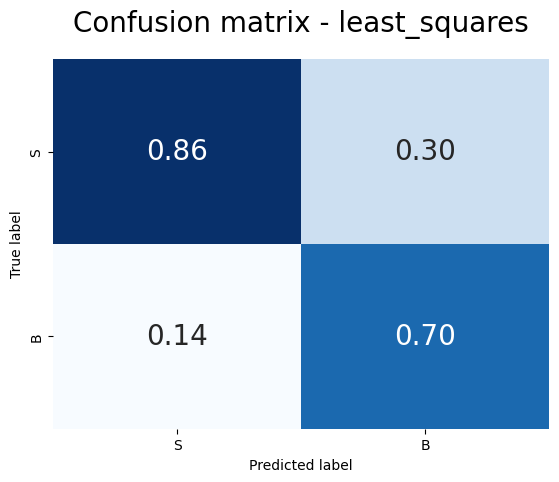

In [194]:
train_huge_magic_plot(x, y, method='least_squares', max_iters=50, gamma=0.001, lambda_=0.001, w_initial=None, split=0.8, plot=True, normalize=True, poly_exp=True, degree=6)

In [197]:
y_test, x_test, ids_test = load_csv_data('data/test.csv')
y_train, x_train, ids_train = load_csv_data('data/train.csv')

x_train = polynomial_expansion(x_train, degree=6)
x_train = standardize(x_train)
init_w = np.zeros(x_train.shape[1])
w, loss = least_squares(y_train, x_train)
plot_magic(y_train, x_train, w, 'Least Squares')

x_test = polynomial_expansion(x_test, degree=6)
x_test = standardize(x_test)
y_p = predict_labels(w, x_test)
create_csv_submission(ids, y_p, 'submission_least_squares_poly6.csv')
#train_huge_magic_plot(x, y, method='least_squares', max_iters=500, gamma=0.001, lambda_=0.001, w_initial=None, split=1, plot=True, normalize=True, poly_exp=True, degree=6)


w: [ 1.17299285e+01  1.42135773e-01  3.10071614e-01 -2.28909451e-01
 -4.66038944e+01 -2.22686467e+00 -2.62256913e+01 -1.81997647e+00
 -1.82326501e-02 -2.60560717e+02 -3.06206440e-01 -1.77763716e-01
  1.54319284e+02  5.14324121e+01 -7.81648273e-04 -2.16312231e-03
  5.01927664e+01  1.03083626e-03  7.16004129e-03 -2.62860907e-01
 -2.02531093e-03  3.73084475e-01 -1.96490366e+05  8.92453333e+00
  1.74711566e+00 -6.37311365e-01  5.85957996e+00  4.13167528e-01
 -1.11958123e+00  2.20490866e+02 -4.79464908e+01 -1.88881268e+00
 -2.19865771e+00  1.01597422e+00  8.18567044e+03  3.50788058e+00
 -8.32887240e+02  9.46180252e+00 -3.26417278e-01  2.19709977e+00
  1.06147165e+00  1.16881915e-02 -5.83130052e+03 -2.45326700e+00
  9.61867183e-04 -1.91962550e-03 -2.04539487e+00 -5.58492753e-02
  3.72805867e-03  3.87574963e+00 -5.47832333e-03 -1.10181445e+00
  3.54535451e+04 -8.40681227e+01  1.95269490e+04  1.42060414e+01
 -3.17745994e+01  1.61427243e+04 -6.67539028e+02 -1.32627992e+00
  7.04234859e+01  6.02

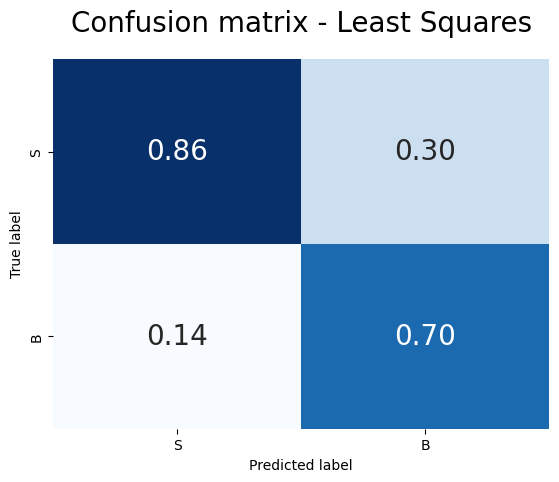

In [200]:
plot_magic(y_train, x_train, w, 'Least Squares')

w: [ 1.16789662e+01  1.54587739e-01  3.04290883e-01 -2.21882323e-01
 -4.25232495e+01 -2.18558309e+00 -2.45959980e+01 -1.66401774e+00
 -1.62169505e-02 -4.58983943e+02 -2.98288162e-01 -1.69266990e-01
  1.30274822e+02  8.98724908e+01 -1.16943457e-03 -2.06471119e-03
  8.80512670e+01 -4.63940668e-03  1.22038837e-02 -2.68845773e-01
 -1.05211246e-03  2.77865951e-01  7.35838118e+04  8.36226272e+00
 -6.51414568e-01  9.61014083e-01  4.93636767e+00 -3.06574682e-01
  4.44639778e-01  3.88589543e+02 -4.74633521e+01 -1.91785156e+00
 -2.17486298e+00  1.04092780e+00  7.15945881e+03  3.45789682e+00
 -9.65425316e+02  8.54355749e+00 -3.31850907e-01  2.28031823e+00
  1.03665148e+00  1.06577935e-02  1.81802311e+04 -2.48816636e+00
 -2.85024124e-04  1.83405488e-03 -2.14574304e+00 -5.18396712e-02
 -8.94645102e-04  3.88259377e+00 -8.72489147e-03 -5.58235042e-01
  4.81822086e+03 -7.85780378e+01  1.97311624e+04 -6.56246964e+02
 -1.41024912e+01  1.63051007e+04 -9.84068891e+02 -1.47127114e+00
  6.91793235e+01  6.04

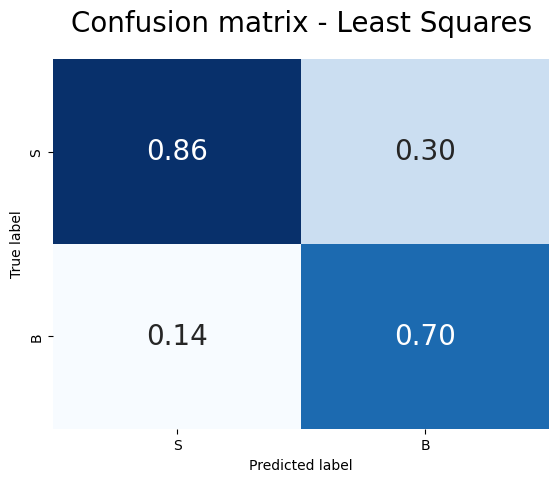

In [221]:
y_train, x_train, ids_train = load_csv_data('data/train.csv')

x_train = polynomial_expansion(x_train, degree=6)
x_train = standardize(x_train)
init_w = np.zeros(x_train.shape[1])

y_train, x_train, y_test, x_test = partition(y_train, x_train, 0.8)
w, loss = least_squares(y_train, x_train)
plot_magic(y_test, x_test, w, 'Least Squares')


In [278]:
y_train, x_train, ids_train = load_csv_data('data/train.csv')
# Clean data
print_data_statistics(y_train, x_train)

Number of samples: 250000
Number of features: 30
Number of positives: 85667
Number of negatives: 164333
Ratio of positives: 0.342668
Ratio of negatives: 0.657332
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0


In [279]:
x_train.shape
# Signal -999 as NaN
xt = x_train
xt[xt == -999] = np.nan
# count number of NaNs per column
print_data_statistics(y_train, xt)


Number of samples: 250000
Number of features: 30
Number of positives: 85667
Number of negatives: 164333
Ratio of positives: 0.342668
Ratio of negatives: 0.657332
Number of missing values: 1580052
Feature with most missing values: 4
Number of missing values in this feature: 177457


In [280]:
# Array showing number of Nans per column
nan_per_column = np.count_nonzero(np.isnan(xt), axis=0)
nan_per_column


array([ 38114,      0,      0,      0, 177457, 177457, 177457,      0,
            0,      0,      0,      0, 177457,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,  99913,
        99913,  99913, 177457, 177457, 177457,      0])

,Nans
Column,
0,38114
1,0
2,0
3,0
4,177457
5,177457
6,177457
7,0
8,0


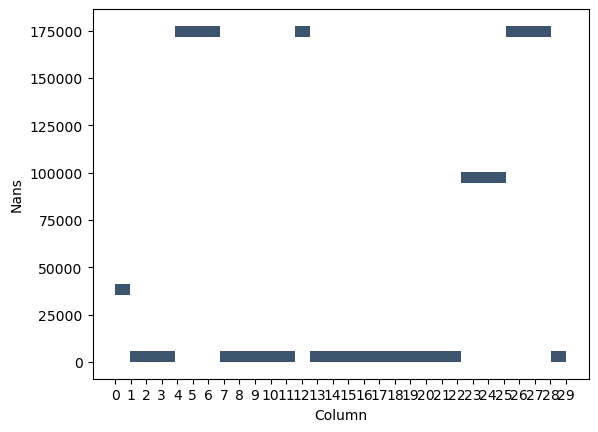

In [281]:
# Plot histogram of number of Nans per column, x-axis is column, y-axis is number of Nans
df = pd.DataFrame(nan_per_column, columns=['Nans'])
df.index.name = 'Column'
sns.histplot(data=df, y='Nans', x='Column', bins=30).set_xticks(range(0, 30, 1), discrete=True)
df

In [310]:
# remove columns 0,4,5,6,12,26,27,28
tx = np.delete(x_train, [0,4,5,6,12,23,24,25,26,27,28], axis=1)
print_data_statistics(y_train, tx)
tx.shape

Number of samples: 250000
Number of features: 19
Number of positives: 85667
Number of negatives: 164333
Ratio of positives: 0.342668
Ratio of negatives: 0.657332
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0


(250000, 19)

In [311]:
# expand, standardize, and add bias
tx = polynomial_expansion(tx, degree=6)
#tx = np.c_[np.ones((tx.shape[0], 1)), tx]
tx = standardize(tx)
tx.shape


(250000, 114)

w: [-1.65308424e-03 -6.14516897e-05  8.94501971e-04  6.98021016e-05
 -7.98954504e-05  7.08623757e-04 -9.19574212e-04  1.27161285e-03
  1.10316911e-03 -4.60415958e-06 -2.07801972e-05 -1.51497812e-04
  6.87868272e-06  1.93744677e-05  9.78391334e-05  3.50143624e-05
  6.24773032e-04  6.17326192e-04  6.18376499e-04 -9.84151544e-04
 -2.96168792e-04  5.06665342e-04 -5.85362810e-05  6.63981950e-06
  4.04376546e-04 -4.63405570e-04  2.22759388e-04  5.94252270e-04
 -5.30439551e-04 -7.64612619e-06 -8.66635760e-05 -6.89850079e-04
 -1.31917989e-05  1.06602483e-04 -2.59122719e-06  3.77837752e-04
  3.95328839e-04  2.27613630e-04 -2.90795856e-04 -1.72989484e-04
  7.79886824e-05 -1.74654497e-04  1.16981960e-05  1.69949051e-04
 -1.47912581e-04  1.16615377e-03  1.78387958e-04  3.99964589e-06
 -9.04987719e-06 -3.31364999e-05  8.57207839e-06  1.19963262e-05
  1.98861039e-05  2.02973396e-05  1.68715009e-04  2.23341528e-04
  2.69384456e-05 -5.76273909e-05 -6.40550315e-05  1.89185497e-05
 -2.68056783e-04  1.16

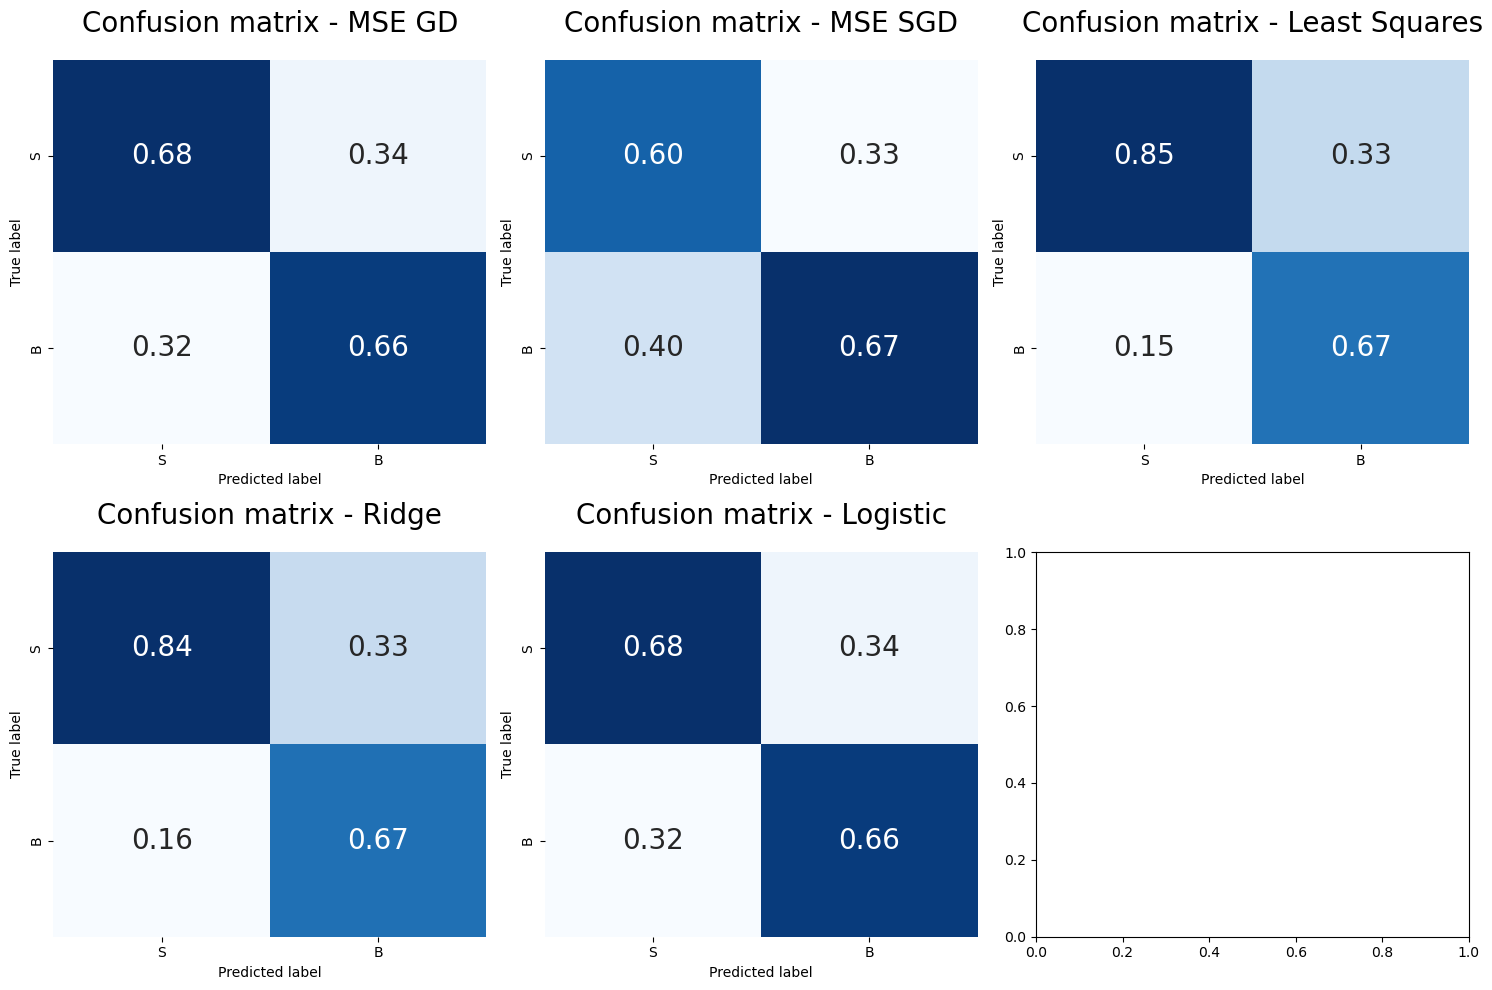

(array([-1.65308424e-03, -6.14516897e-05,  8.94501971e-04,  6.98021016e-05,
        -7.98954504e-05,  7.08623757e-04, -9.19574212e-04,  1.27161285e-03,
         1.10316911e-03, -4.60415958e-06, -2.07801972e-05, -1.51497812e-04,
         6.87868272e-06,  1.93744677e-05,  9.78391334e-05,  3.50143624e-05,
         6.24773032e-04,  6.17326192e-04,  6.18376499e-04, -9.84151544e-04,
        -2.96168792e-04,  5.06665342e-04, -5.85362810e-05,  6.63981950e-06,
         4.04376546e-04, -4.63405570e-04,  2.22759388e-04,  5.94252270e-04,
        -5.30439551e-04, -7.64612619e-06, -8.66635760e-05, -6.89850079e-04,
        -1.31917989e-05,  1.06602483e-04, -2.59122719e-06,  3.77837752e-04,
         3.95328839e-04,  2.27613630e-04, -2.90795856e-04, -1.72989484e-04,
         7.79886824e-05, -1.74654497e-04,  1.16981960e-05,  1.69949051e-04,
        -1.47912581e-04,  1.16615377e-03,  1.78387958e-04,  3.99964589e-06,
        -9.04987719e-06, -3.31364999e-05,  8.57207839e-06,  1.19963262e-05,
         1.9

In [312]:
train_huge_magic_plot(tx, y_train, method='all', max_iters=50, gamma=0.0001, lambda_=0.0001, split=0.8, plot=True, normalize=False, poly_exp=False)

w: [-9.20674423e-02  6.55028546e-03  3.18020580e-02  2.97560441e-02
 -1.59560568e-02  2.29971234e-02 -4.72732710e-02  5.19283227e-02
  5.75045947e-02 -7.14264699e-04 -1.05555216e-03 -8.84881791e-04
 -1.76607900e-04  8.29872969e-04 -3.97632737e-03  1.44799872e-03
  1.41008532e-02  1.80308095e-02  1.41980946e-02 -4.13091599e-02
 -1.58097504e-02  1.53854874e-02  1.78483155e-02 -1.17590028e-03
  4.66431597e-03 -1.70068534e-02  2.03266628e-02  1.91580408e-02
 -2.08655904e-02 -7.47823601e-04  2.36155027e-03 -2.99153118e-02
 -5.87186393e-04  2.53684782e-03 -2.45717033e-04 -8.34299982e-04
  5.66509969e-03 -4.73687739e-03  1.48181202e-04 -9.10799849e-03
  1.15183779e-03  6.62358549e-03 -3.70737973e-04 -3.65152563e-03
 -2.33230429e-04  4.44814357e-02 -1.97310203e-03 -1.14270800e-04
 -2.19770908e-04  3.95621142e-03 -1.54556336e-04  3.79430121e-04
 -1.59777886e-04  5.11596320e-04 -7.61140008e-03 -4.29338862e-03
 -7.28466580e-03  8.98263218e-03 -1.97882515e-03 -2.98821352e-04
 -2.87799609e-03 -3.94

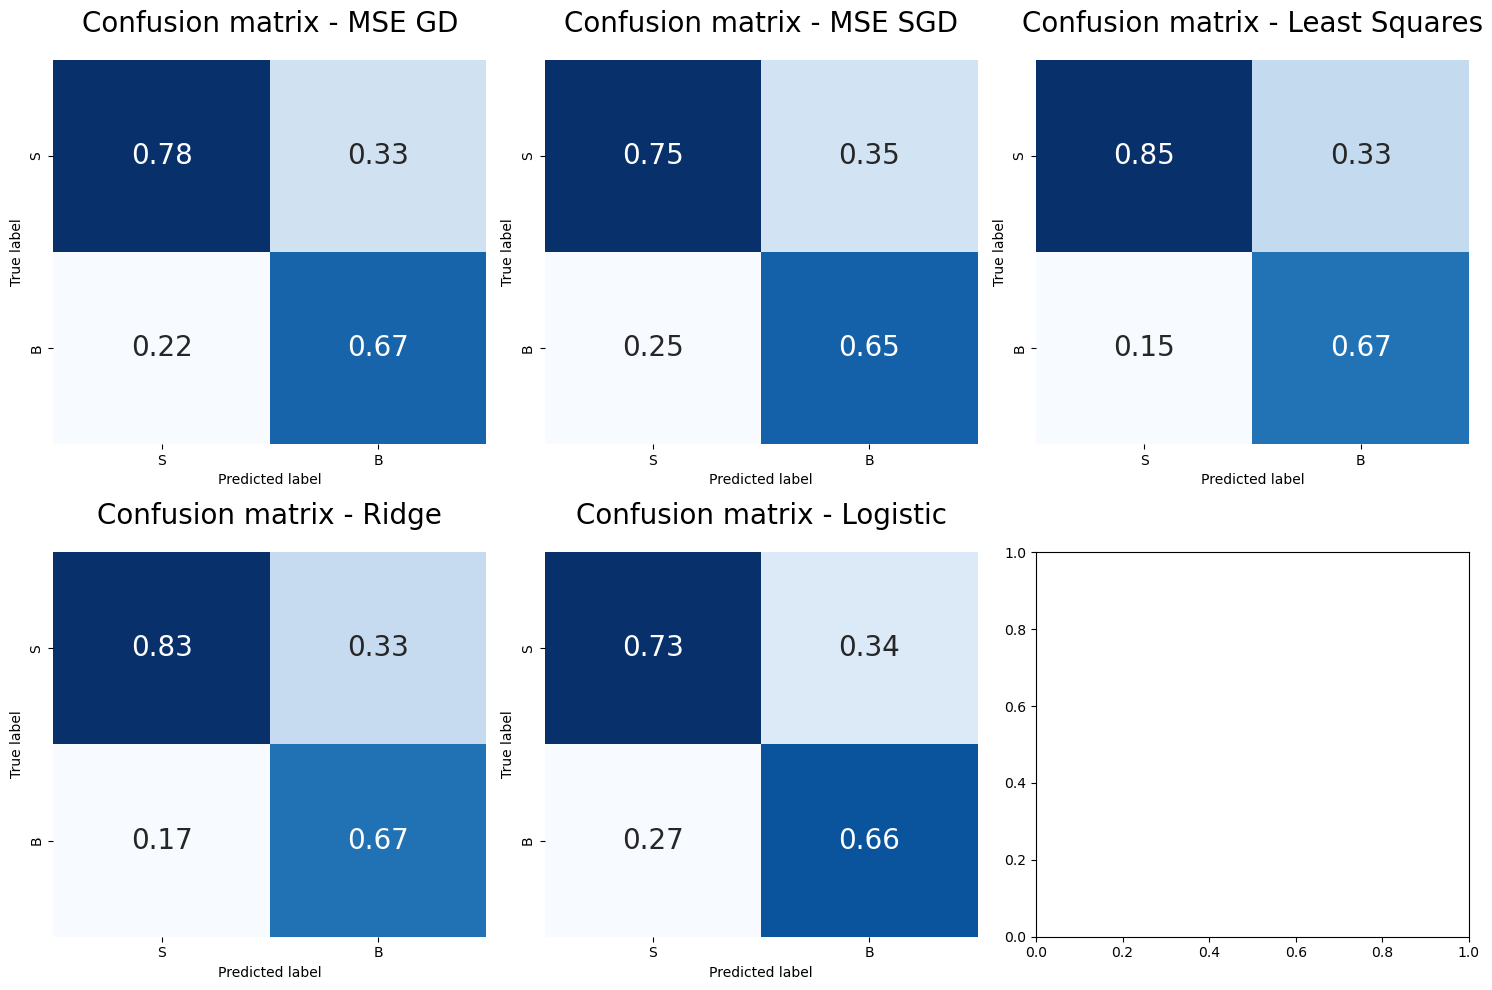

(array([-9.20674423e-02,  6.55028546e-03,  3.18020580e-02,  2.97560441e-02,
        -1.59560568e-02,  2.29971234e-02, -4.72732710e-02,  5.19283227e-02,
         5.75045947e-02, -7.14264699e-04, -1.05555216e-03, -8.84881791e-04,
        -1.76607900e-04,  8.29872969e-04, -3.97632737e-03,  1.44799872e-03,
         1.41008532e-02,  1.80308095e-02,  1.41980946e-02, -4.13091599e-02,
        -1.58097504e-02,  1.53854874e-02,  1.78483155e-02, -1.17590028e-03,
         4.66431597e-03, -1.70068534e-02,  2.03266628e-02,  1.91580408e-02,
        -2.08655904e-02, -7.47823601e-04,  2.36155027e-03, -2.99153118e-02,
        -5.87186393e-04,  2.53684782e-03, -2.45717033e-04, -8.34299982e-04,
         5.66509969e-03, -4.73687739e-03,  1.48181202e-04, -9.10799849e-03,
         1.15183779e-03,  6.62358549e-03, -3.70737973e-04, -3.65152563e-03,
        -2.33230429e-04,  4.44814357e-02, -1.97310203e-03, -1.14270800e-04,
        -2.19770908e-04,  3.95621142e-03, -1.54556336e-04,  3.79430121e-04,
        -1.5

In [313]:
train_huge_magic_plot(tx, y_train, method='all', max_iters=500, gamma=0.001, lambda_=0.001, split=0.85, plot=True, normalize=False, poly_exp=False)

In [315]:
ys, x_test, ids_test = load_csv_data('data/test.csv')
# Clean data
x_test[x_test == -999] = np.nan
print_data_statistics(ys, x_test)

Number of samples: 568238
Number of features: 30
Number of positives: 568238
Number of negatives: 0
Ratio of positives: 1.0
Ratio of negatives: 0.0
Number of missing values: 3588434
Feature with most missing values: 4
Number of missing values in this feature: 402796
Number of samples: 568238
Number of features: 19
Number of positives: 568238
Number of negatives: 0
Ratio of positives: 1.0
Ratio of negatives: 0.0
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0


In [336]:
from helpers import *
from implementations import *
x_t = np.delete(x_test, [0,4,5,6,12,23,24,25,26,27,28], axis=1)
print_data_statistics(ys, x_t)
x_t = polynomial_expansion(x_t, degree=6)
x_t = standardize(x_t)
x_t.shape

#w, loss = mean_squared_error_gd(y_train, tx, initial_w=np.zeros(tx.shape[1]), max_iters=15000, gamma=0.0001)
# add new data points and noise
tx_aug = np.delete(x_train, [0,4,5,6,12,23,24,25,26,27,28], axis=1)
tx_aug = polynomial_expansion(tx_aug, degree=20)
tx_aug = standardize(tx_aug)
y_train_aug, tx_aug = augment(y_train, tx_aug, 0.1)
y_train_aug, tx_aug = augment(y_train_aug, tx_aug, 0.01)
y_train_aug, tx_aug = augment(y_train_aug, tx_aug, 0.01)
tx_aug = standardize(tx_aug)
print_data_statistics(y_train_aug, tx_aug)
#w, loss = mean_squared_error_sgd(y_train_aug, tx_aug, initial_w=np.zeros(tx_aug.shape[1]), max_iters=15000, gamma=0.0001)
w, loss = mse_sgd(y_train_aug, tx_aug, initial_w=np.zeros(tx_aug.shape[1]), max_iters=150000, gamma=0.000001)
y_p = predict_labels(w, tx_aug)
create_csv_submission(ids_test, y_p, 'submission_mse_sgd_poly20_19vars_augx8_01.csv')
#w, loss = ridge_regression(y_train, tx, 0.001)

Number of samples: 568238
Number of features: 19
Number of positives: 568238
Number of negatives: 0
Ratio of positives: 1.0
Ratio of negatives: 0.0
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0
Number of samples: 2000000
Number of features: 380
Number of positives: 685336
Number of negatives: 1314664
Ratio of positives: 0.342668
Ratio of negatives: 0.657332
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0
Current iteration=100, the loss=0.49989678100118984
Current iteration=200, the loss=0.4997886037349737
Current iteration=300, the loss=0.49967394899367257
Current iteration=400, the loss=0.49955812059353594
Current iteration=500, the loss=0.49945292460919305
Current iteration=600, the loss=0.4993577763789393
Current iteration=700, the loss=0.49926178432422635
Current iteration=800, the loss=0.4991629942107404
Current iteration=900, the loss=0.49905540569261664
Curre

In [339]:
print("W MSE SGD: {}".format(w))
compute_loss(y_train_aug, tx_aug, w)
w1 = w 
w1, loss = mse_sgd(y_train_aug, tx_aug, initial_w=w1, max_iters=15000, gamma=0.00001)
compute_loss(y_train_aug, tx_aug, w1)

W MSE SGD: [-3.80586605e-02  2.29079156e-03  1.55665338e-02  7.94165342e-03
 -4.29938571e-03  1.21913063e-02 -2.14974390e-02  2.16498957e-02
  2.48283850e-02 -2.49519669e-04 -3.60476176e-04 -3.15241664e-03
  1.09452449e-05  4.18614032e-04 -4.59941393e-04  6.58079525e-04
  9.51014737e-03  1.02773726e-02  9.42965798e-03 -2.07807994e-02
 -4.93250419e-03  8.51826916e-03  4.57402344e-03 -3.24510021e-04
  5.25351597e-03 -1.00523172e-02  7.01769271e-03  1.13841683e-02
 -8.96742893e-03 -2.74958511e-04 -1.47711190e-03 -1.23074836e-02
 -1.64134246e-04  1.39884446e-03 -3.87217820e-05  3.89000989e-03
  6.15731872e-03  1.31912025e-03 -4.33260810e-03 -3.08356151e-03
  9.76599227e-04  1.44671169e-03 -6.00645209e-05  7.29060390e-04
 -2.47011568e-03  1.83720815e-02  2.07561889e-03 -1.13474052e-05
 -6.89295770e-05 -8.72048370e-05  3.12758301e-05  2.29247688e-04
  5.34315684e-05  3.15636564e-04  5.08205647e-05  2.75727644e-03
 -1.82015744e-03  5.60336334e-04 -9.99949308e-04  4.43973797e-05
 -1.11172307e-

0.4281111823993608

In [341]:
print("W MSE SGD: {}".format(w1))
w2 = w1 
w2, loss = mse_sgd(y_train_aug, tx_aug, initial_w=w1, max_iters=50000, gamma=0.000005)

W MSE SGD: [-6.36868881e-02  5.57208128e-03  2.29871976e-02  1.73805515e-02
 -7.96613976e-03  1.86223503e-02 -3.45765161e-02  3.03518297e-02
  4.07102960e-02 -6.64004112e-04 -5.30539790e-04 -2.88486681e-03
 -8.09883041e-04  5.09622918e-04 -2.22867945e-03  1.24898132e-03
  1.32619991e-02  1.57080595e-02  1.33633273e-02 -3.18361906e-02
 -8.29451057e-03  1.22995584e-02  1.10091097e-02 -5.18913677e-04
  6.59541223e-03 -1.46741311e-02  1.16535078e-02  1.58036217e-02
 -1.30285434e-02 -9.42776444e-04 -4.84577781e-04 -1.84967443e-02
  1.70616721e-04  1.79236830e-03  6.84997804e-05  3.65215996e-03
  1.00020759e-02  2.22640278e-04 -4.21805196e-03 -5.04803623e-03
  1.17180007e-03  4.96813195e-03 -1.63068816e-04 -6.34783518e-04
 -2.56307079e-03  2.39000883e-02  4.00811341e-04 -7.18697503e-05
 -6.06831620e-05  1.05241232e-03 -5.31906650e-04  8.75385853e-05
 -3.63528930e-05  5.86196123e-04 -2.20368791e-03  4.83825178e-03
 -4.03930238e-03  2.66082731e-03 -1.25875405e-03 -6.24584518e-05
  1.41802383e-

In [343]:
w3 = w2
w3 , loss = mse_sgd(y_train_aug, tx_aug, initial_w=w2, max_iters=5000, gamma=0.00001)

Current iteration=100, the loss=0.4195448261630262
Current iteration=200, the loss=0.4195108695426791
Current iteration=300, the loss=0.41947502574853657
Current iteration=400, the loss=0.41945181650198127
Current iteration=500, the loss=0.4194175836942543
Current iteration=600, the loss=0.41938572250553796
Current iteration=700, the loss=0.4193523813292516
Current iteration=800, the loss=0.41928893930637773
Current iteration=900, the loss=0.4192564371295218
Current iteration=1000, the loss=0.4192122251443352
Current iteration=1100, the loss=0.41917538322338654
Current iteration=1200, the loss=0.41913721383532715
Current iteration=1300, the loss=0.4191039416169213
Current iteration=1400, the loss=0.4189606970446637
Current iteration=1500, the loss=0.418931119033543
Current iteration=1600, the loss=0.4188900121619784
Current iteration=1700, the loss=0.4188555416947874
Current iteration=1800, the loss=0.4188083740322235
Current iteration=1900, the loss=0.41877113146531636
Current iterati

In [346]:
w4 = w3
w4, loss = mse_sgd(y_train_aug, tx_aug, initial_w=w3, max_iters=15000, gamma=0.000005)

Current iteration=100, the loss=0.41774971732896293
Current iteration=200, the loss=0.4168327153173613
Current iteration=300, the loss=0.416816709465551
Current iteration=400, the loss=0.4167952022842721
Current iteration=500, the loss=0.4167723565892745
Current iteration=600, the loss=0.41675623309904364
Current iteration=700, the loss=0.4167398059379616
Current iteration=800, the loss=0.4167221696147417
Current iteration=900, the loss=0.4167053591343813
Current iteration=1000, the loss=0.41669107636010616
Current iteration=1100, the loss=0.41668099156474003
Current iteration=1200, the loss=0.4166440941182134
Current iteration=1300, the loss=0.4166299425684593
Current iteration=1400, the loss=0.41660773134803086
Current iteration=1500, the loss=0.4165936202732806
Current iteration=1600, the loss=0.4165778936092223
Current iteration=1700, the loss=0.41656149477564985
Current iteration=1800, the loss=0.41654229468670484
Current iteration=1900, the loss=0.41652147698559633
Current iterat

In [349]:
y_p = predict_labels(w4, tx_aug)
create_csv_submission(ids_test, y_p, 'submission_mse_sgd_poly20_19vars_augx8_01.csv') # bad, maybe too much augmentation / overfitting?
# lets try to keep the model quite high degree but add a lot of data points with less noise so it gets constrained
tx_aug = np.delete(x_train, [0,4,5,6,12,23,24,25,26,27,28], axis=1)
tx_aug = polynomial_expansion(tx_aug, degree=20)
y_aug, tx_aug = augment(y_train, tx_aug, 0.1)
y_aug, tx_aug = augment(y_aug, tx_aug, 0.01)
y_aug, tx_aug = augment(y_aug, tx_aug, 0.005)
y_aug, tx_aug = augment(y_aug, tx_aug, 0.001)
tx_aug = standardize(tx_aug)
#w, loss = mse_sgd(y_aug, tx_aug, initial_w=np.zeros(tx_aug.shape[1]), max_iters=15000, gamma=0.0001)

Current iteration=100, the loss=0.4894075480125085
Current iteration=200, the loss=0.4814924597694729
Current iteration=300, the loss=0.47494207463361526
Current iteration=400, the loss=0.46993980821548625
Current iteration=500, the loss=0.46546155007796486
Current iteration=600, the loss=0.4613457706530677
Current iteration=700, the loss=0.4574180398389406
Current iteration=800, the loss=0.45511863076651715
Current iteration=900, the loss=0.4523445944561492
Current iteration=1000, the loss=0.45050354050756064
Current iteration=1100, the loss=0.4490416957265053
Current iteration=1200, the loss=0.44690122064891996
Current iteration=1300, the loss=0.445369939977654
Current iteration=1400, the loss=0.44353708219691657
Current iteration=1500, the loss=0.4420564571121748
Current iteration=1600, the loss=0.4408256284533211
Current iteration=1700, the loss=0.43980103771731793
Current iteration=1800, the loss=0.4386341927638933
Current iteration=1900, the loss=0.4375343744489384
Current iterat

In [352]:
w, loss = mse_sgd(y_aug, tx_aug, initial_w=np.zeros(tx_aug.shape[1]), max_iters=2500, gamma=0.0001)

Current iteration=100, the loss=0.49054555514949016
Current iteration=200, the loss=0.4832525327006216
Current iteration=300, the loss=0.47961402206983517
Current iteration=400, the loss=0.4739469694020152
Current iteration=500, the loss=0.46935202338576076
Current iteration=600, the loss=0.46497645336989635
Current iteration=700, the loss=0.46135616154363357
Current iteration=800, the loss=0.45893934555579496
Current iteration=900, the loss=0.4565597516554723
Current iteration=1000, the loss=0.45431254513386005
Current iteration=1100, the loss=0.4526270047209237
Current iteration=1200, the loss=0.4506766686617675
Current iteration=1300, the loss=0.4484748048792359
Current iteration=1400, the loss=0.4471579375009208
Current iteration=1500, the loss=0.4456140050041623
Current iteration=1600, the loss=0.44415217476309715
Current iteration=1700, the loss=0.4430220148039255
Current iteration=1800, the loss=0.4420223779531848
Current iteration=1900, the loss=0.4408605850219248
Current itera

In [378]:
tx_aug = np.delete(x_train, [0,4,5,6,12,23,24,25,26,27,28], axis=1)
tx_aug = standardize(tx_aug)
tx_aug = polynomial_expansion(tx_aug, degree=50)
tx_aug = standardize(tx_aug)
y_tr, x_tr, y_tst, x_tst= partition(y_train, tx_aug, 0.8)
y_tr_aug, x_tr_aug = augment(y_tr, x_tr, 0.1)
y_tr_aug, x_tr_aug = augment(y_tr_aug, x_tr_aug, 0.01)
x_tr_aug = standardize(x_tr_aug)

Number of samples: 200000
Number of features: 950
Number of positives: 68437
Number of negatives: 131563
Ratio of positives: 0.342185
Ratio of negatives: 0.657815
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0
Number of samples: 800000
Number of features: 950
Number of positives: 273748
Number of negatives: 526252
Ratio of positives: 0.342185
Ratio of negatives: 0.657815
Number of missing values: 0
Feature with most missing values: 0
Number of missing values in this feature: 0
w: [-3.99903205e-01 -4.81578748e-02 -2.73696977e-02  9.60118346e-02
 -4.11286068e-02  1.27131853e-01  7.34246182e-02 -1.14921150e-01
  4.48624922e-01  2.30802665e-02  7.04392793e-03 -1.17475817e-02
 -2.38226803e-02  1.06703367e-02  1.04688093e-01  1.91653915e-02
 -4.69901736e-02 -5.16860110e-02  1.32429236e-01  3.12360675e-02
 -1.05006089e+00  2.76672188e-01  3.15428946e-01  5.93582546e-01
  3.47186015e-01  1.42896678e-01 -1.57860136e-02 -1.04652954e+00

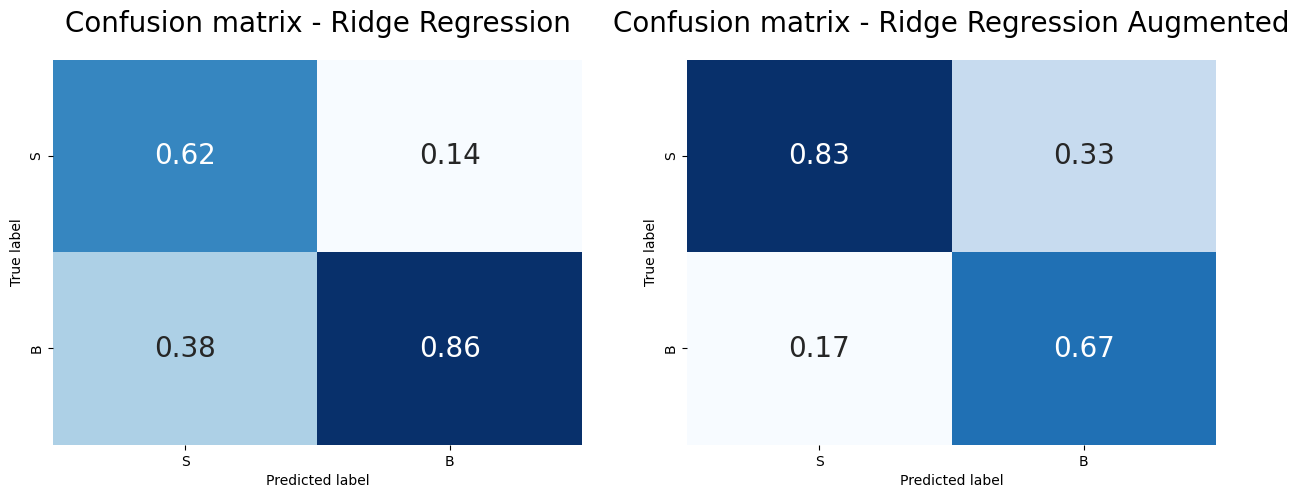

In [379]:
print_data_statistics(y_tr, x_tr)
print_data_statistics(y_tr_aug, x_tr_aug)
#w, loss = mse_sgd(y_tr, x_tr, initial_w=np.zeros(tx_aug.shape[1]), max_iters=19000, gamma=0.000005)
w, loss = ridge_regression(y_tr, x_tr, 0.0000001)
w_aug, loss_aug = ridge_regression(y_tr_aug, x_tr_aug, 0.0000001)
f, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_magic(y_tst, x_tst, w, 'Ridge Regression', ax[0])
plot_magic(y_tst, x_tst, w_aug, 'Ridge Regression Augmented', ax[1])


## Properly Handling of Missing Values

w: [ 4.26018645e-01 -5.77125511e-02 -1.33297823e-01  7.91401314e-02
  4.88354631e-01 -6.34797379e-02  1.02758493e-01 -4.32238082e-02
 -5.25696332e-02 -1.80364017e-01 -2.98807230e-03 -2.73902862e-02
  1.66504801e-01  1.98120343e-01 -2.08072649e-03 -4.35520461e-03
  1.47313725e-01 -1.79488127e-02  1.38998722e-02  5.95608394e-02
  1.23234216e-02 -9.56754510e-02 -5.82681316e-01  1.91385828e-01
 -3.10722498e-02  1.58044812e-02  1.56237501e-01 -7.47376499e-03
  3.22991881e-02 -2.21299461e-01 -1.85082804e+00 -2.16365202e-01
 -2.97514878e-01  2.41768369e-01  1.32849018e-01  4.23807222e-01
 -5.29841497e-02 -6.38340667e-02  8.13843255e-01  4.42052308e-01
 -1.25833947e-01 -8.57229760e-03 -2.08264975e-01  2.21993732e-02
 -4.14501432e-02  1.10815078e-02 -8.45589144e-02 -4.23687978e-02
  1.21358955e-01  1.03138584e-01 -7.90265025e-02 -7.78605064e-02
  3.28228523e-02 -4.75499160e-01  9.79115703e-02  7.43677493e-02
 -4.36692854e-01  1.00586682e-01 -1.30209319e-01  7.06655745e-01
 -5.70323024e+00  4.48

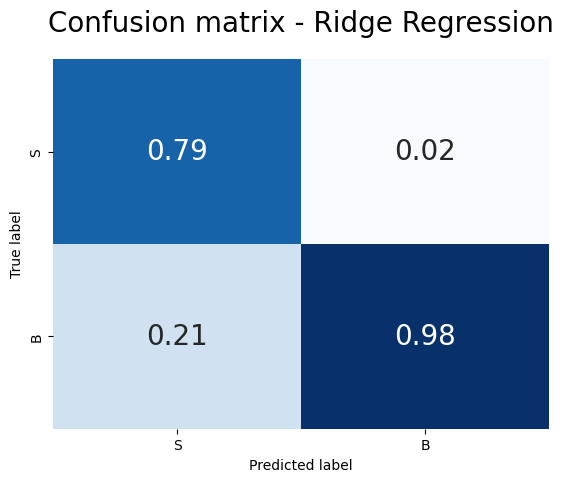

In [408]:
x_ = x_train
y_ = y_train
x_[x_ == -999] = np.nan
# idea 1: replace -999 with 0
# idea 2: replace -999 with mean of column
# idea 3: replace -999 with mean of elements in same column with same value of y
# idea 4: replace -999 with mean of elements in same column with same value of y with some noise added
# idea 5: train a model with the columns containing the NaNs and augment with noise

# test ideas with ridge regression

# idea 1: replace -999 with 0 - loss: 0.3885237685974012
#x_ = np.nan_to_num(x_, nan=0)
#x_ = standardize(x_)

# idea 2: replace -999 with mean of column - loss: 0.3899173815412533
#x_ = np.nan_to_num(x_, nan=np.nanmean(x_, axis=0))
#x_ = standardize(x_)

# idea 3: replace -999 with mean of elements in same column with same value of y
# bit more complicated than I expected

# idea 4: drop the rows with -999 - loss: 0.3071022499160975
y_ = y_[~np.isnan(x_).any(axis=1)]
x_ = x_[~np.isnan(x_).any(axis=1)]
x_ = standardize(x_) # loss: 0.3071022499160975
#x_ = polynomial_expansion(x_, degree=20)
#x_ = standardize(x_) # loss: 0.2526206194140157
x_ = polynomial_expansion(x_, degree=30)
x_ = standardize(x_) # loss: 0.25240904402077685
y_tr, x_tr, y_tst, x_tst= partition(y_, x_, 0.8)
#print_data_statistics(y_, x_)
w, loss = ridge_regression(y_tr, x_tr, 0.0000001)
plot_magic(y_tst, x_tst, w, 'Ridge Regression')

w: [-2.25356143e+02  3.56865773e+00 -2.71950804e+02  1.61525785e+01
  3.42937142e-01 -4.79308312e+00  9.39430242e-01 -2.97630208e-01
 -3.08179985e-01  5.13511213e+01  3.11115895e-01  1.13596549e-01
  6.05028662e-02  6.85943944e+00  1.09493791e-01 -3.99535127e-02
  2.42752931e-01  7.96031002e-02 -1.04214691e-01 -1.11848206e+01
 -3.38975735e-01  1.60569085e+02  6.56889502e-01 -8.71138182e+01
  2.67156281e-01  5.67249945e-01  1.83967695e+01  3.48348701e-01
  8.78210867e+00 -1.93641074e+00  4.24327582e+03 -5.92991908e+01
  3.94889887e+03 -2.29312802e+02 -7.69447807e+00  8.37153621e+01
  8.64199821e-01  2.93569053e+00 -3.12852731e+00 -7.42592461e+02
 -1.34671075e+00 -4.02681656e-01 -1.56050592e-02  9.65683073e+00
 -6.26098195e-01 -8.29859345e-01 -1.13487788e+02 -7.65820003e-01
  7.12038750e-01  2.61460665e+02  2.33095306e-01 -2.46934075e+03
  2.48017186e+00  8.89433140e+02  6.17090508e-01  1.26205291e+00
 -4.61387630e+01 -3.74352017e+00 -5.35910837e-01  4.83035447e+02
 -5.02680474e+04  8.63

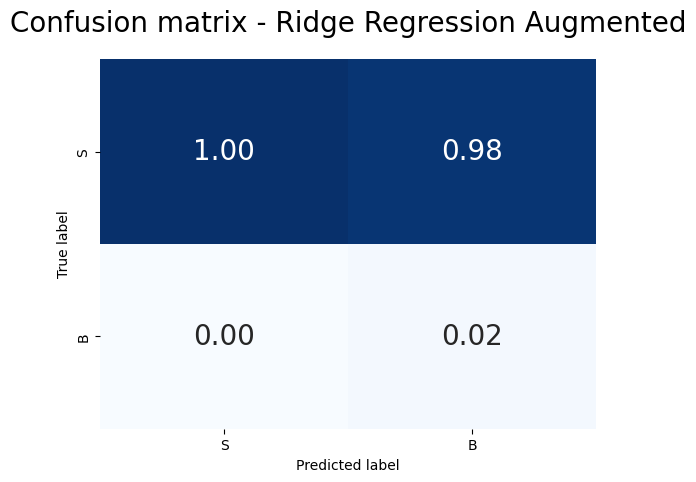

In [433]:
# SO, dropping the rows with NaNs is the best option, but we can still try to augment the data
x_ = x_train
y_ = y_train

x_ = polynomial_expansion(x_, degree=30)
x = standardize(x_)
y_tr, x_tr, y_tst, x_tst = partition(y_, x_, 0.8)
x_tr[x_tr == -999] = np.nan
x_tst[x_tst == -999] = np.nan # we set the test data to 0 because we don't know the values and we'll need to predict them
y_tr = y_tr[~np.isnan(x_tr).any(axis=1)]
x_tr = x_tr[~np.isnan(x_tr).any(axis=1)]

y_tr_aug, x_tr_aug = augment(y_tr, x_tr, 0.1)
y_tr_aug, x_tr_aug = augment(y_tr_aug, x_tr_aug, 0.01)
y_tr_aug, x_tr_aug = augment(y_tr_aug, x_tr_aug, 0.005)
x_tr_aug = standardize(x_tr_aug)


In [436]:


# idea: train model to predict NaN 
# concatenate both test and train data and  create model to predict the NaNs
# then use the model to predict the NaNs and use the predicted values to augment the data
#....



In [439]:
w, loss = mse_sgd(y_tr_aug, x_tr_aug, initial_w=np.zeros(x_tr.shape[1]), max_iters=25000, gamma=0.000005)

Current iteration=100, the loss=0.49660033709452783
Current iteration=200, the loss=0.4935659555453691
Current iteration=300, the loss=0.49014634151502867
Current iteration=400, the loss=0.48682410114355945
Current iteration=500, the loss=0.48397803093515585
Current iteration=600, the loss=0.48089197537873907
Current iteration=700, the loss=0.4779412620131986
Current iteration=800, the loss=0.4752424173075022
Current iteration=900, the loss=0.47269088718081104
Current iteration=1000, the loss=0.47018013463965636
Current iteration=1100, the loss=0.46777824618498226
Current iteration=1200, the loss=0.4655267224725868
Current iteration=1300, the loss=0.4636524539366872
Current iteration=1400, the loss=0.46150591177245187
Current iteration=1500, the loss=0.4592422100930873
Current iteration=1600, the loss=0.45702373487814296
Current iteration=1700, the loss=0.45481590060612304
Current iteration=1800, the loss=0.4528262322928134
Current iteration=1900, the loss=0.4508562899244292
Current it

Number of samples: 50000
Number of features: 900
Number of positives: 17230
Number of negatives: 32770
Ratio of positives: 0.3446
Ratio of negatives: 0.6554
Number of missing values: 6764820
Feature with most missing values: 4
Number of missing values in this feature: 24840


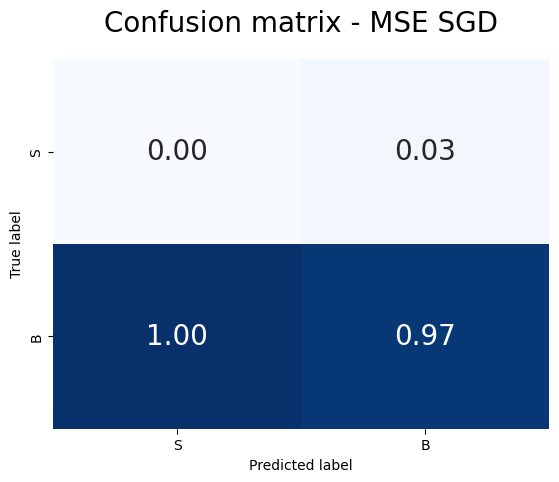

In [444]:
plot_magic(y_tst, x_tst, w, 'MSE SGD')
print_data_statistics(y_tst, x_tst) # seems to me that if it's negative it has certain values definitely missing..........